In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [4]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 67)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [5]:
import numpy as np
import random

number_codes = []
for i in range(2**(10-1), 2**10-1):
    for j in bin(i).split('b')[1]:
        number_codes.append(int(j))
number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

slice = random.sample(range(511),45)

number_codes = number_codes[:,slice].tolist() 

In [6]:
classes = []
for i in range(45):
    code_list = np.array(number_codes).T[i]
    classes.append(np.where(code_list==1)[0].tolist())

In [7]:
matrix_errors = []

for i in range(9):
    for j in range(i+1,10):
        matrix_errors.append(45 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
np.min(matrix_errors)
        # print(number_codes[i], number_codes[j], 3 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
#np.mean(matrix_errors)  

18

In [8]:
winner_list = []

for i,class1 in enumerate(classes):
    print("running:{}/45".format(i))
    winner = get_winner(class1)
    winner_list.append(winner)

running:0/45
number of class1:1291
number of class2:326

 ****** Running generation 0 ****** 

Population's average fitness: 0.44216 stdev: 0.19994
Best fitness: 0.81323 - size: (2, 13) - species 5 - id 55
Average adjusted fitness: 0.311
Mean genetic distance 2.910, standard deviation 0.458
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 7.274 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58204 stdev: 0.20347
Best fitness: 0.81323 - size: (2, 13) - species 7 - id 55
Average adjusted fitness: 0.358
Mean genetic distance 2.983, standard deviation 0.476
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 7.714 sec (7.494 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62545 stdev: 0.19693
Best fitness: 0.81633 - size: (3, 14) - species 3 - id 523
Average adjusted fitness: 0.415
Mean genetic distance 3.014, standard deviation 0.485
Population of 202 members in 31 species
Tot

Population's average fitness: 0.71193 stdev: 0.18874
Best fitness: 0.88621 - size: (7, 21) - species 26 - id 3239
Average adjusted fitness: 0.516
Mean genetic distance 3.127, standard deviation 0.512
Population of 205 members in 29 species
Total extinctions: 0
Generation time: 10.534 sec (10.090 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.72602 stdev: 0.17661
Best fitness: 0.88621 - size: (7, 21) - species 26 - id 3239
Average adjusted fitness: 0.523
Mean genetic distance 3.130, standard deviation 0.512
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 10.712 sec (10.179 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.72734 stdev: 0.15990
Best fitness: 0.88621 - size: (7, 21) - species 26 - id 3239
Average adjusted fitness: 0.519
Mean genetic distance 3.142, standard deviation 0.505
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 11.386 sec (10.347 average)

 

Population's average fitness: 0.68519 stdev: 0.19636
Best fitness: 0.88992 - size: (9, 23) - species 38 - id 6957
Average adjusted fitness: 0.482
Mean genetic distance 3.257, standard deviation 0.531
Population of 203 members in 18 species
Total extinctions: 0
Generation time: 13.111 sec (12.491 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.69546 stdev: 0.18810
Best fitness: 0.88992 - size: (9, 23) - species 38 - id 6957
Average adjusted fitness: 0.505
Mean genetic distance 3.260, standard deviation 0.546
Population of 203 members in 18 species
Total extinctions: 0
Generation time: 13.100 sec (12.477 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.69896 stdev: 0.19033
Best fitness: 0.88992 - size: (9, 23) - species 38 - id 6957
Average adjusted fitness: 0.494
Mean genetic distance 3.275, standard deviation 0.532
Population of 203 members in 19 species
Total extinctions: 0
Generation time: 12.904 sec (12.593 average)

 

Population's average fitness: 0.59178 stdev: 0.08170
Best fitness: 0.74892 - size: (6, 23) - species 24 - id 954
Average adjusted fitness: 0.219
Mean genetic distance 2.986, standard deviation 0.477
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 11.092 sec (9.256 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.59986 stdev: 0.08709
Best fitness: 0.75139 - size: (6, 19) - species 28 - id 1111
Average adjusted fitness: 0.286
Mean genetic distance 3.060, standard deviation 0.476
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 10.446 sec (9.426 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.60701 stdev: 0.08396
Best fitness: 0.77304 - size: (7, 20) - species 13 - id 1262
Average adjusted fitness: 0.305
Mean genetic distance 3.092, standard deviation 0.479
Population of 196 members in 34 species
Total extinctions: 0
Generation time: 10.309 sec (9.537 average)

 ******

Population's average fitness: 0.63798 stdev: 0.09535
Best fitness: 0.81200 - size: (6, 24) - species 3 - id 2779
Average adjusted fitness: 0.220
Mean genetic distance 3.187, standard deviation 0.484
Population of 196 members in 29 species
Total extinctions: 0
Generation time: 11.989 sec (10.604 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.64836 stdev: 0.09003
Best fitness: 0.81200 - size: (6, 24) - species 3 - id 2779
Average adjusted fitness: 0.287
Mean genetic distance 3.167, standard deviation 0.509
Population of 196 members in 28 species
Total extinctions: 0
Generation time: 10.387 sec (10.661 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.64399 stdev: 0.09671
Best fitness: 0.81200 - size: (6, 24) - species 3 - id 2779
Average adjusted fitness: 0.210
Mean genetic distance 3.169, standard deviation 0.502
Population of 196 members in 28 species
Total extinctions: 0
Generation time: 10.595 sec (10.541 average)

 ***

Population's average fitness: 0.65448 stdev: 0.09297
Best fitness: 0.81756 - size: (7, 25) - species 3 - id 7016
Average adjusted fitness: 0.179
Mean genetic distance 3.244, standard deviation 0.560
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 12.158 sec (11.628 average)

 ****** Running generation 54 ****** 

Population's average fitness: 0.65329 stdev: 0.10194
Best fitness: 0.81756 - size: (8, 28) - species 3 - id 7779
Average adjusted fitness: 0.309
Mean genetic distance 3.247, standard deviation 0.566
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 11.913 sec (11.679 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.64136 stdev: 0.10107
Best fitness: 0.81756 - size: (7, 25) - species 3 - id 7016
Average adjusted fitness: 0.241
Mean genetic distance 3.228, standard deviation 0.582
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 14.881 sec (12.070 average)

 ***

Population's average fitness: 0.60222 stdev: 0.08708
Best fitness: 0.74644 - size: (3, 14) - species 35 - id 650
Average adjusted fitness: 0.225
Mean genetic distance 3.230, standard deviation 0.479
Population of 204 members in 45 species
Total extinctions: 0
Generation time: 9.678 sec (10.385 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.61234 stdev: 0.08174
Best fitness: 0.74644 - size: (3, 14) - species 35 - id 650
Average adjusted fitness: 0.234
Mean genetic distance 3.223, standard deviation 0.486
Population of 206 members in 45 species
Total extinctions: 0
Generation time: 10.549 sec (10.430 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.60256 stdev: 0.09036
Best fitness: 0.74644 - size: (3, 14) - species 35 - id 650
Average adjusted fitness: 0.226
Mean genetic distance 3.199, standard deviation 0.474
Population of 206 members in 46 species
Total extinctions: 0
Generation time: 11.198 sec (10.623 average)

 ****

Population's average fitness: 0.63083 stdev: 0.07504
Best fitness: 0.76067 - size: (6, 18) - species 35 - id 4495
Average adjusted fitness: 0.227
Mean genetic distance 3.210, standard deviation 0.524
Population of 193 members in 28 species
Total extinctions: 0
Generation time: 11.669 sec (11.182 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.61911 stdev: 0.08929
Best fitness: 0.76067 - size: (6, 18) - species 35 - id 4495
Average adjusted fitness: 0.230
Mean genetic distance 3.196, standard deviation 0.526
Population of 194 members in 27 species
Total extinctions: 0
Generation time: 10.743 sec (11.255 average)

 ****** Running generation 36 ****** 

Population's average fitness: 0.62884 stdev: 0.07504
Best fitness: 0.76067 - size: (6, 18) - species 35 - id 4495
Average adjusted fitness: 0.257
Mean genetic distance 3.174, standard deviation 0.530
Population of 191 members in 24 species
Total extinctions: 0
Generation time: 11.669 sec (11.247 average)

 

Population's average fitness: 0.61320 stdev: 0.08679
Best fitness: 0.76252 - size: (7, 21) - species 35 - id 6804
Average adjusted fitness: 0.213
Mean genetic distance 3.195, standard deviation 0.571
Population of 194 members in 17 species
Total extinctions: 0
Generation time: 12.738 sec (12.882 average)

 ****** Running generation 59 ****** 

Population's average fitness: 0.61866 stdev: 0.08567
Best fitness: 0.76252 - size: (7, 21) - species 35 - id 6804
Average adjusted fitness: 0.246
Mean genetic distance 3.240, standard deviation 0.562
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 11.379 sec (12.616 average)

 ****** Running generation 60 ****** 

Population's average fitness: 0.62802 stdev: 0.07187
Best fitness: 0.76252 - size: (7, 21) - species 35 - id 6804
Average adjusted fitness: 0.207
Mean genetic distance 3.228, standard deviation 0.541
Population of 197 members in 19 species
Total extinctions: 0
Generation time: 11.500 sec (12.347 average)

 

Population's average fitness: 0.72136 stdev: 0.16353
Best fitness: 0.86024 - size: (5, 17) - species 32 - id 1881
Average adjusted fitness: 0.521
Mean genetic distance 3.087, standard deviation 0.496
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 10.105 sec (9.301 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.72465 stdev: 0.14863
Best fitness: 0.86024 - size: (5, 17) - species 32 - id 1881
Average adjusted fitness: 0.540
Mean genetic distance 3.112, standard deviation 0.502
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 9.424 sec (9.384 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.70657 stdev: 0.17584
Best fitness: 0.86024 - size: (5, 17) - species 32 - id 1881
Average adjusted fitness: 0.519
Mean genetic distance 3.149, standard deviation 0.502
Population of 193 members in 29 species
Total extinctions: 0
Generation time: 9.736 sec (9.465 average)

 *****

Population's average fitness: 0.70915 stdev: 0.17937
Best fitness: 0.86704 - size: (8, 26) - species 7 - id 4347
Average adjusted fitness: 0.506
Mean genetic distance 3.266, standard deviation 0.556
Population of 204 members in 18 species
Total extinctions: 0
Generation time: 13.069 sec (11.950 average)

 ****** Running generation 40 ****** 

Population's average fitness: 0.70631 stdev: 0.18991
Best fitness: 0.86704 - size: (8, 26) - species 7 - id 4347
Average adjusted fitness: 0.499
Mean genetic distance 3.294, standard deviation 0.549
Population of 202 members in 20 species
Total extinctions: 0
Generation time: 13.288 sec (12.108 average)

 ****** Running generation 41 ****** 

Population's average fitness: 0.69113 stdev: 0.18967
Best fitness: 0.86704 - size: (8, 26) - species 7 - id 4347
Average adjusted fitness: 0.502
Mean genetic distance 3.287, standard deviation 0.555
Population of 198 members in 20 species
Total extinctions: 0
Generation time: 12.496 sec (12.238 average)

 ***

Population's average fitness: 0.72779 stdev: 0.17529
Best fitness: 0.87199 - size: (9, 26) - species 7 - id 9736
Average adjusted fitness: 0.511
Mean genetic distance 3.396, standard deviation 0.590
Population of 202 members in 19 species
Total extinctions: 0
Generation time: 12.832 sec (12.635 average)

 ****** Running generation 64 ****** 

Population's average fitness: 0.70107 stdev: 0.19373
Best fitness: 0.87199 - size: (9, 26) - species 7 - id 9736
Average adjusted fitness: 0.495
Mean genetic distance 3.371, standard deviation 0.610
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 13.175 sec (12.703 average)

 ****** Running generation 65 ****** 

Population's average fitness: 0.73402 stdev: 0.16694
Best fitness: 0.87199 - size: (9, 26) - species 7 - id 9736
Average adjusted fitness: 0.527
Mean genetic distance 3.387, standard deviation 0.606
Population of 197 members in 19 species
Total extinctions: 0
Generation time: 12.813 sec (12.746 average)

 ***

Population's average fitness: 0.61597 stdev: 0.07520
Best fitness: 0.74521 - size: (6, 21) - species 13 - id 1541
Average adjusted fitness: 0.224
Mean genetic distance 3.119, standard deviation 0.530
Population of 192 members in 27 species
Total extinctions: 0
Generation time: 9.810 sec (9.711 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.60706 stdev: 0.08391
Best fitness: 0.74521 - size: (6, 21) - species 13 - id 1541
Average adjusted fitness: 0.209
Mean genetic distance 3.117, standard deviation 0.525
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 10.101 sec (9.714 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.61521 stdev: 0.07554
Best fitness: 0.74521 - size: (6, 21) - species 13 - id 1541
Average adjusted fitness: 0.232
Mean genetic distance 3.090, standard deviation 0.536
Population of 195 members in 25 species
Total extinctions: 0
Generation time: 10.899 sec (9.889 average)

 ****

Population's average fitness: 0.62807 stdev: 0.07567
Best fitness: 0.74521 - size: (6, 21) - species 13 - id 1541
Average adjusted fitness: 0.262
Mean genetic distance 3.202, standard deviation 0.559
Population of 198 members in 19 species
Total extinctions: 0
Generation time: 11.876 sec (11.343 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.62315 stdev: 0.08416
Best fitness: 0.74521 - size: (6, 21) - species 13 - id 1541
Average adjusted fitness: 0.326
Mean genetic distance 3.182, standard deviation 0.579
Population of 194 members in 18 species
Total extinctions: 0
Generation time: 11.865 sec (11.456 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.63049 stdev: 0.07171
Best fitness: 0.74521 - size: (6, 21) - species 13 - id 1541
Average adjusted fitness: 0.235
Mean genetic distance 3.166, standard deviation 0.561
Population of 194 members in 19 species
Total extinctions: 0
Generation time: 12.112 sec (11.554 average)

 

Total extinctions: 0
Generation time: 8.506 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55343 stdev: 0.09924
Best fitness: 0.73964 - size: (2, 13) - species 2 - id 157
Average adjusted fitness: 0.269
Mean genetic distance 3.013, standard deviation 0.486
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 7.817 sec (8.161 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59841 stdev: 0.08312
Best fitness: 0.78541 - size: (2, 14) - species 1 - id 532
Average adjusted fitness: 0.285
Mean genetic distance 3.035, standard deviation 0.503
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 8.007 sec (8.110 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.58935 stdev: 0.09486
Best fitness: 0.78541 - size: (2, 14) - species 15 - id 532
Average adjusted fitness: 0.234
Mean genetic distance 3.105, standard deviation 0.538
Population of 204 members in 32 

Population's average fitness: 0.65204 stdev: 0.10995
Best fitness: 0.81633 - size: (6, 22) - species 4 - id 2684
Average adjusted fitness: 0.271
Mean genetic distance 3.230, standard deviation 0.515
Population of 191 members in 30 species
Total extinctions: 0
Generation time: 10.499 sec (10.117 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.66357 stdev: 0.10128
Best fitness: 0.81633 - size: (6, 22) - species 4 - id 2684
Average adjusted fitness: 0.307
Mean genetic distance 3.296, standard deviation 0.490
Population of 192 members in 29 species
Total extinctions: 0
Generation time: 10.822 sec (10.278 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.67115 stdev: 0.08765
Best fitness: 0.81633 - size: (6, 22) - species 4 - id 2684
Average adjusted fitness: 0.267
Mean genetic distance 3.303, standard deviation 0.504
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 10.498 sec (10.294 average)

 ***

Population's average fitness: 0.67855 stdev: 0.10192
Best fitness: 0.82560 - size: (7, 22) - species 7 - id 6580
Average adjusted fitness: 0.305
Mean genetic distance 3.338, standard deviation 0.539
Population of 193 members in 21 species
Total extinctions: 0
Generation time: 12.644 sec (12.033 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.67798 stdev: 0.10528
Best fitness: 0.82560 - size: (7, 22) - species 7 - id 6580
Average adjusted fitness: 0.291
Mean genetic distance 3.315, standard deviation 0.544
Population of 197 members in 20 species
Total extinctions: 0
Generation time: 11.794 sec (12.025 average)

 ****** Running generation 51 ****** 

Population's average fitness: 0.67009 stdev: 0.11154
Best fitness: 0.82560 - size: (7, 22) - species 7 - id 6580
Average adjusted fitness: 0.309
Mean genetic distance 3.329, standard deviation 0.531
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 12.479 sec (12.085 average)

 ***

Population's average fitness: 0.61513 stdev: 0.10683
Best fitness: 0.80952 - size: (4, 18) - species 27 - id 1099
Average adjusted fitness: 0.277
Mean genetic distance 3.072, standard deviation 0.507
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 8.734 sec (8.217 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.61703 stdev: 0.10679
Best fitness: 0.82931 - size: (5, 20) - species 27 - id 1237
Average adjusted fitness: 0.266
Mean genetic distance 3.095, standard deviation 0.514
Population of 207 members in 35 species
Total extinctions: 0
Generation time: 9.741 sec (8.407 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.61474 stdev: 0.10931
Best fitness: 0.82931 - size: (5, 20) - species 27 - id 1237
Average adjusted fitness: 0.226
Mean genetic distance 3.103, standard deviation 0.504
Population of 207 members in 35 species
Total extinctions: 0
Generation time: 9.370 sec (8.514 average)

 ****** R

Population's average fitness: 0.66337 stdev: 0.12575
Best fitness: 0.85405 - size: (9, 29) - species 35 - id 4399
Average adjusted fitness: 0.376
Mean genetic distance 3.189, standard deviation 0.498
Population of 196 members in 28 species
Total extinctions: 0
Generation time: 11.399 sec (10.388 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.65506 stdev: 0.12441
Best fitness: 0.85405 - size: (9, 29) - species 35 - id 4399
Average adjusted fitness: 0.292
Mean genetic distance 3.166, standard deviation 0.496
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 10.564 sec (10.398 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.66816 stdev: 0.11722
Best fitness: 0.85405 - size: (9, 29) - species 41 - id 4399
Average adjusted fitness: 0.297
Mean genetic distance 3.171, standard deviation 0.489
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 10.607 sec (10.463 average)

 

Population's average fitness: 0.68722 stdev: 0.13255
Best fitness: 0.88930 - size: (11, 31) - species 40 - id 6581
Average adjusted fitness: 0.351
Mean genetic distance 3.360, standard deviation 0.563
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 13.331 sec (12.518 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.67215 stdev: 0.13356
Best fitness: 0.88930 - size: (11, 31) - species 40 - id 6581
Average adjusted fitness: 0.300
Mean genetic distance 3.364, standard deviation 0.566
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 12.301 sec (12.486 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.67058 stdev: 0.14379
Best fitness: 0.88930 - size: (11, 31) - species 40 - id 6581
Average adjusted fitness: 0.457
Mean genetic distance 3.356, standard deviation 0.576
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 12.198 sec (12.445 average)

Population's average fitness: 0.60678 stdev: 0.09783
Best fitness: 0.77242 - size: (6, 21) - species 35 - id 1768
Average adjusted fitness: 0.220
Mean genetic distance 3.264, standard deviation 0.538
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 9.665 sec (9.185 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.61292 stdev: 0.10005
Best fitness: 0.77242 - size: (6, 21) - species 35 - id 1768
Average adjusted fitness: 0.233
Mean genetic distance 3.241, standard deviation 0.511
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 9.475 sec (9.332 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.61891 stdev: 0.10374
Best fitness: 0.77242 - size: (6, 21) - species 35 - id 1768
Average adjusted fitness: 0.290
Mean genetic distance 3.254, standard deviation 0.517
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 9.958 sec (9.427 average)

 ******

Population's average fitness: 0.63948 stdev: 0.10133
Best fitness: 0.80952 - size: (7, 22) - species 34 - id 4283
Average adjusted fitness: 0.243
Mean genetic distance 3.327, standard deviation 0.539
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 10.456 sec (10.746 average)

 ****** Running generation 36 ****** 

Population's average fitness: 0.64247 stdev: 0.10143
Best fitness: 0.80952 - size: (7, 22) - species 34 - id 4283
Average adjusted fitness: 0.306
Mean genetic distance 3.336, standard deviation 0.541
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 11.233 sec (10.824 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.63436 stdev: 0.10947
Best fitness: 0.80952 - size: (7, 22) - species 34 - id 4283
Average adjusted fitness: 0.230
Mean genetic distance 3.350, standard deviation 0.532
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 11.245 sec (10.920 average)

 

Population's average fitness: 0.63980 stdev: 0.11118
Best fitness: 0.82746 - size: (11, 31) - species 46 - id 6776
Average adjusted fitness: 0.312
Mean genetic distance 3.191, standard deviation 0.552
Population of 203 members in 22 species
Total extinctions: 0
Generation time: 12.183 sec (12.175 average)

 ****** Running generation 60 ****** 

Population's average fitness: 0.64204 stdev: 0.10458
Best fitness: 0.82746 - size: (11, 31) - species 46 - id 6776
Average adjusted fitness: 0.249
Mean genetic distance 3.190, standard deviation 0.557
Population of 203 members in 22 species
Total extinctions: 0
Generation time: 12.244 sec (12.164 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.64248 stdev: 0.10449
Best fitness: 0.82746 - size: (11, 31) - species 46 - id 6776
Average adjusted fitness: 0.241
Mean genetic distance 3.188, standard deviation 0.545
Population of 197 members in 21 species
Total extinctions: 0
Generation time: 13.068 sec (12.238 average)

Population's average fitness: 0.63431 stdev: 0.10957
Best fitness: 0.80829 - size: (6, 22) - species 44 - id 1585
Average adjusted fitness: 0.375
Mean genetic distance 3.259, standard deviation 0.490
Population of 201 members in 47 species
Total extinctions: 0
Generation time: 9.890 sec (9.785 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.63928 stdev: 0.10590
Best fitness: 0.80829 - size: (6, 22) - species 44 - id 1585
Average adjusted fitness: 0.336
Mean genetic distance 3.244, standard deviation 0.493
Population of 199 members in 44 species
Total extinctions: 0
Generation time: 9.637 sec (9.810 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.64870 stdev: 0.10042
Best fitness: 0.80829 - size: (6, 22) - species 44 - id 1585
Average adjusted fitness: 0.291
Mean genetic distance 3.250, standard deviation 0.510
Population of 192 members in 36 species
Total extinctions: 0
Generation time: 10.082 sec (9.849 average)

 *****

Population's average fitness: 0.65317 stdev: 0.10083
Best fitness: 0.80829 - size: (6, 22) - species 44 - id 1585
Average adjusted fitness: 0.305
Mean genetic distance 3.338, standard deviation 0.551
Population of 193 members in 21 species
Total extinctions: 0
Generation time: 12.128 sec (12.153 average)

 ****** Running generation 41 ****** 

Population's average fitness: 0.65191 stdev: 0.11172
Best fitness: 0.80829 - size: (6, 22) - species 44 - id 1585
Average adjusted fitness: 0.313
Mean genetic distance 3.326, standard deviation 0.550
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 11.761 sec (12.106 average)

 ****** Running generation 42 ****** 

Population's average fitness: 0.64784 stdev: 0.11190
Best fitness: 0.80829 - size: (6, 22) - species 44 - id 1585
Average adjusted fitness: 0.295
Mean genetic distance 3.344, standard deviation 0.539
Population of 197 members in 21 species
Total extinctions: 0
Generation time: 12.649 sec (12.175 average)

 

Population's average fitness: 0.63415 stdev: 0.10972
Best fitness: 0.81509 - size: (9, 27) - species 57 - id 6671
Average adjusted fitness: 0.282
Mean genetic distance 3.265, standard deviation 0.582
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 11.933 sec (12.762 average)

 ****** Running generation 65 ****** 

Population's average fitness: 0.63939 stdev: 0.09934
Best fitness: 0.81509 - size: (9, 27) - species 57 - id 6671
Average adjusted fitness: 0.235
Mean genetic distance 3.266, standard deviation 0.587
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 13.822 sec (12.888 average)

 ****** Running generation 66 ****** 

Population's average fitness: 0.64534 stdev: 0.09886
Best fitness: 0.81509 - size: (9, 27) - species 57 - id 6671
Average adjusted fitness: 0.277
Mean genetic distance 3.270, standard deviation 0.600
Population of 205 members in 16 species
Total extinctions: 0
Generation time: 13.784 sec (12.993 average)
ru

Population's average fitness: 0.63928 stdev: 0.07780
Best fitness: 0.76314 - size: (6, 17) - species 17 - id 2363
Average adjusted fitness: 0.240
Mean genetic distance 3.209, standard deviation 0.481
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 10.214 sec (10.191 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.64006 stdev: 0.07882
Best fitness: 0.76314 - size: (6, 17) - species 17 - id 2363
Average adjusted fitness: 0.286
Mean genetic distance 3.202, standard deviation 0.486
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 10.816 sec (10.262 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.63046 stdev: 0.08815
Best fitness: 0.76314 - size: (6, 17) - species 17 - id 2363
Average adjusted fitness: 0.238
Mean genetic distance 3.204, standard deviation 0.487
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 10.888 sec (10.326 average)

 

Population's average fitness: 0.63700 stdev: 0.09147
Best fitness: 0.76933 - size: (8, 26) - species 29 - id 6132
Average adjusted fitness: 0.267
Mean genetic distance 3.317, standard deviation 0.543
Population of 195 members in 23 species
Total extinctions: 0
Generation time: 12.706 sec (12.379 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.63031 stdev: 0.10022
Best fitness: 0.76933 - size: (8, 26) - species 29 - id 6132
Average adjusted fitness: 0.234
Mean genetic distance 3.285, standard deviation 0.543
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 12.446 sec (12.378 average)

 ****** Running generation 47 ****** 

Population's average fitness: 0.64341 stdev: 0.09362
Best fitness: 0.76933 - size: (8, 26) - species 29 - id 6132
Average adjusted fitness: 0.287
Mean genetic distance 3.291, standard deviation 0.547
Population of 193 members in 23 species
Total extinctions: 0
Generation time: 12.894 sec (12.402 average)

 

Mean genetic distance 3.001, standard deviation 0.486
Population of 204 members in 26 species
Total extinctions: 0
Generation time: 8.173 sec (8.032 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.58523 stdev: 0.10456
Best fitness: 0.78355 - size: (4, 16) - species 24 - id 637
Average adjusted fitness: 0.360
Mean genetic distance 3.047, standard deviation 0.497
Population of 206 members in 26 species
Total extinctions: 0
Generation time: 8.106 sec (8.050 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.60528 stdev: 0.09960
Best fitness: 0.78664 - size: (3, 15) - species 2 - id 848
Average adjusted fitness: 0.285
Mean genetic distance 3.113, standard deviation 0.499
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 8.871 sec (8.214 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.60276 stdev: 0.11334
Best fitness: 0.82808 - size: (3, 14) - species 6 - id 943
Average 

Mean genetic distance 3.306, standard deviation 0.503
Population of 197 members in 29 species
Total extinctions: 0
Generation time: 10.267 sec (10.290 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.67727 stdev: 0.11290
Best fitness: 0.84477 - size: (5, 18) - species 6 - id 3914
Average adjusted fitness: 0.309
Mean genetic distance 3.320, standard deviation 0.503
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 10.711 sec (10.383 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.66930 stdev: 0.11649
Best fitness: 0.84477 - size: (5, 18) - species 6 - id 3914
Average adjusted fitness: 0.307
Mean genetic distance 3.341, standard deviation 0.522
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 11.090 sec (10.475 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.66502 stdev: 0.12145
Best fitness: 0.84848 - size: (5, 19) - species 6 - id 42

Mean genetic distance 3.327, standard deviation 0.573
Population of 195 members in 23 species
Total extinctions: 0
Generation time: 12.076 sec (12.445 average)

 ****** Running generation 51 ****** 

Population's average fitness: 0.67897 stdev: 0.14017
Best fitness: 0.86766 - size: (6, 21) - species 6 - id 6407
Average adjusted fitness: 0.303
Mean genetic distance 3.350, standard deviation 0.564
Population of 195 members in 22 species
Total extinctions: 0
Generation time: 11.982 sec (12.469 average)

 ****** Running generation 52 ****** 

Population's average fitness: 0.68651 stdev: 0.14100
Best fitness: 0.86766 - size: (6, 21) - species 6 - id 6407
Average adjusted fitness: 0.326
Mean genetic distance 3.315, standard deviation 0.562
Population of 193 members in 21 species
Total extinctions: 0
Generation time: 12.476 sec (12.444 average)

 ****** Running generation 53 ****** 

Population's average fitness: 0.67414 stdev: 0.14032
Best fitness: 0.86766 - size: (6, 21) - species 6 - id 64

Mean genetic distance 3.150, standard deviation 0.481
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 8.841 sec (8.423 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.58010 stdev: 0.08507
Best fitness: 0.75387 - size: (4, 14) - species 25 - id 933
Average adjusted fitness: 0.246
Mean genetic distance 3.141, standard deviation 0.495
Population of 200 members in 40 species
Total extinctions: 0
Generation time: 9.150 sec (8.504 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.59635 stdev: 0.08470
Best fitness: 0.75510 - size: (3, 17) - species 31 - id 1418
Average adjusted fitness: 0.226
Mean genetic distance 3.163, standard deviation 0.482
Population of 200 members in 40 species
Total extinctions: 0
Generation time: 8.964 sec (8.550 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.59914 stdev: 0.08287
Best fitness: 0.75510 - size: (3, 17) - species 31 - id 1418
Ave

Mean genetic distance 3.346, standard deviation 0.516
Population of 196 members in 28 species
Total extinctions: 0
Generation time: 11.010 sec (10.791 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.62842 stdev: 0.08835
Best fitness: 0.79097 - size: (5, 20) - species 26 - id 3383
Average adjusted fitness: 0.213
Mean genetic distance 3.383, standard deviation 0.524
Population of 193 members in 26 species
Total extinctions: 0
Generation time: 11.843 sec (10.957 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.61958 stdev: 0.09390
Best fitness: 0.79097 - size: (5, 20) - species 26 - id 3383
Average adjusted fitness: 0.289
Mean genetic distance 3.384, standard deviation 0.523
Population of 195 members in 26 species
Total extinctions: 0
Generation time: 11.165 sec (11.020 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.62102 stdev: 0.09607
Best fitness: 0.79097 - size: (5, 20) - species 26 - id

Mean genetic distance 3.344, standard deviation 0.629
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 13.624 sec (12.594 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.63417 stdev: 0.09407
Best fitness: 0.79716 - size: (11, 30) - species 36 - id 7156
Average adjusted fitness: 0.213
Mean genetic distance 3.348, standard deviation 0.610
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 12.960 sec (12.628 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.62893 stdev: 0.09748
Best fitness: 0.79716 - size: (11, 30) - species 36 - id 7156
Average adjusted fitness: 0.283
Mean genetic distance 3.317, standard deviation 0.639
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 13.047 sec (12.647 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.61484 stdev: 0.09575
Best fitness: 0.79716 - size: (11, 30) - species 36 -

Mean genetic distance 3.095, standard deviation 0.491
Population of 203 members in 40 species
Total extinctions: 0
Generation time: 9.633 sec (9.182 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.67758 stdev: 0.11850
Best fitness: 0.81200 - size: (5, 18) - species 5 - id 1605
Average adjusted fitness: 0.377
Mean genetic distance 3.100, standard deviation 0.493
Population of 193 members in 40 species
Total extinctions: 0
Generation time: 9.952 sec (9.235 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.69827 stdev: 0.11432
Best fitness: 0.81200 - size: (5, 18) - species 5 - id 1605
Average adjusted fitness: 0.474
Mean genetic distance 3.102, standard deviation 0.495
Population of 203 members in 40 species
Total extinctions: 0
Generation time: 9.139 sec (9.318 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.69082 stdev: 0.11517
Best fitness: 0.81880 - size: (8, 23) - species 40 - id 2217
Av

Mean genetic distance 3.302, standard deviation 0.518
Population of 193 members in 27 species
Total extinctions: 0
Generation time: 11.424 sec (11.329 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.71275 stdev: 0.11465
Best fitness: 0.83364 - size: (11, 30) - species 40 - id 2706
Average adjusted fitness: 0.402
Mean genetic distance 3.291, standard deviation 0.515
Population of 196 members in 26 species
Total extinctions: 0
Generation time: 11.529 sec (11.396 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.71104 stdev: 0.10728
Best fitness: 0.83364 - size: (11, 30) - species 40 - id 2706
Average adjusted fitness: 0.411
Mean genetic distance 3.293, standard deviation 0.544
Population of 190 members in 24 species
Total extinctions: 0
Generation time: 12.147 sec (11.516 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.69597 stdev: 0.13050
Best fitness: 0.83921 - size: (12, 30) - species 40 -

Mean genetic distance 3.149, standard deviation 0.595
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 12.703 sec (13.102 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.70750 stdev: 0.12551
Best fitness: 0.84045 - size: (9, 28) - species 50 - id 8323
Average adjusted fitness: 0.407
Mean genetic distance 3.189, standard deviation 0.587
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 13.129 sec (13.149 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.70699 stdev: 0.12700
Best fitness: 0.84045 - size: (9, 28) - species 50 - id 8323
Average adjusted fitness: 0.426
Mean genetic distance 3.179, standard deviation 0.584
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 13.926 sec (13.247 average)

 ****** Running generation 63 ****** 

Population's average fitness: 0.69883 stdev: 0.12739
Best fitness: 0.84045 - size: (9, 28) - species 50 - id

Mean genetic distance 3.269, standard deviation 0.493
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 11.352 sec (9.698 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.64350 stdev: 0.10657
Best fitness: 0.78169 - size: (7, 23) - species 15 - id 1964
Average adjusted fitness: 0.362
Mean genetic distance 3.263, standard deviation 0.487
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 10.170 sec (9.821 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.64989 stdev: 0.10049
Best fitness: 0.78169 - size: (7, 23) - species 15 - id 1964
Average adjusted fitness: 0.307
Mean genetic distance 3.264, standard deviation 0.478
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 9.990 sec (9.909 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.65639 stdev: 0.09347
Best fitness: 0.78169 - size: (7, 23) - species 15 - id 196

Mean genetic distance 3.333, standard deviation 0.522
Population of 192 members in 24 species
Total extinctions: 0
Generation time: 11.480 sec (11.820 average)

 ****** Running generation 42 ****** 

Population's average fitness: 0.66780 stdev: 0.08981
Best fitness: 0.80148 - size: (7, 23) - species 29 - id 5188
Average adjusted fitness: 0.263
Mean genetic distance 3.330, standard deviation 0.524
Population of 198 members in 23 species
Total extinctions: 0
Generation time: 11.746 sec (11.935 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.66919 stdev: 0.09729
Best fitness: 0.80148 - size: (7, 23) - species 29 - id 5188
Average adjusted fitness: 0.294
Mean genetic distance 3.299, standard deviation 0.520
Population of 195 members in 21 species
Total extinctions: 0
Generation time: 13.249 sec (12.007 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.67102 stdev: 0.09344
Best fitness: 0.80767 - size: (8, 30) - species 42 - id

Mean genetic distance 3.284, standard deviation 0.599
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 13.360 sec (12.597 average)

 ****** Running generation 66 ****** 

Population's average fitness: 0.65210 stdev: 0.09816
Best fitness: 0.82622 - size: (8, 24) - species 29 - id 8319
Average adjusted fitness: 0.254
Mean genetic distance 3.257, standard deviation 0.579
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 12.471 sec (12.590 average)
running:14/45
number of class1:804
number of class2:813

 ****** Running generation 0 ****** 

Population's average fitness: 0.49995 stdev: 0.07183
Best fitness: 0.72604 - size: (2, 13) - species 4 - id 12
Average adjusted fitness: 0.231
Mean genetic distance 2.908, standard deviation 0.473
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 7.221 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54117 stdev: 0.06758
Best fitness: 0.73346 

Mean genetic distance 3.224, standard deviation 0.455
Population of 193 members in 37 species
Total extinctions: 0
Generation time: 9.817 sec (9.772 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.62794 stdev: 0.08526
Best fitness: 0.78046 - size: (4, 15) - species 23 - id 2117
Average adjusted fitness: 0.190
Mean genetic distance 3.251, standard deviation 0.451
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 10.038 sec (9.875 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.62180 stdev: 0.08957
Best fitness: 0.78046 - size: (4, 15) - species 23 - id 2117
Average adjusted fitness: 0.252
Mean genetic distance 3.253, standard deviation 0.461
Population of 195 members in 37 species
Total extinctions: 0
Generation time: 10.448 sec (9.990 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.62513 stdev: 0.08817
Best fitness: 0.78046 - size: (4, 15) - species 23 - id 211

Mean genetic distance 3.269, standard deviation 0.507
Population of 198 members in 26 species
Total extinctions: 0
Generation time: 12.406 sec (11.653 average)

 ****** Running generation 47 ****** 

Population's average fitness: 0.62540 stdev: 0.09285
Best fitness: 0.78293 - size: (7, 19) - species 23 - id 5316
Average adjusted fitness: 0.189
Mean genetic distance 3.280, standard deviation 0.516
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 13.574 sec (11.831 average)

 ****** Running generation 48 ****** 

Population's average fitness: 0.63199 stdev: 0.09474
Best fitness: 0.78293 - size: (7, 19) - species 23 - id 5316
Average adjusted fitness: 0.369
Mean genetic distance 3.288, standard deviation 0.511
Population of 192 members in 23 species
Total extinctions: 0
Generation time: 11.792 sec (11.787 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.62941 stdev: 0.08971
Best fitness: 0.78293 - size: (7, 19) - species 23 - id

Mean genetic distance 3.098, standard deviation 0.512
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 9.103 sec (7.996 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58198 stdev: 0.09291
Best fitness: 0.76623 - size: (4, 18) - species 12 - id 676
Average adjusted fitness: 0.195
Mean genetic distance 3.106, standard deviation 0.522
Population of 205 members in 27 species
Total extinctions: 0
Generation time: 8.878 sec (8.172 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59618 stdev: 0.09455
Best fitness: 0.76623 - size: (4, 18) - species 12 - id 676
Average adjusted fitness: 0.255
Mean genetic distance 3.100, standard deviation 0.510
Population of 204 members in 27 species
Total extinctions: 0
Generation time: 10.502 sec (8.561 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.59868 stdev: 0.10182
Best fitness: 0.78973 - size: (3, 15) - species 17 - id 1116
Aver

Mean genetic distance 3.231, standard deviation 0.524
Population of 191 members in 23 species
Total extinctions: 0
Generation time: 10.046 sec (10.261 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.65243 stdev: 0.09910
Best fitness: 0.82313 - size: (6, 21) - species 21 - id 3530
Average adjusted fitness: 0.224
Mean genetic distance 3.257, standard deviation 0.540
Population of 207 members in 21 species
Total extinctions: 0
Generation time: 10.095 sec (10.284 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.64167 stdev: 0.10393
Best fitness: 0.82313 - size: (6, 21) - species 21 - id 3530
Average adjusted fitness: 0.305
Mean genetic distance 3.240, standard deviation 0.542
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 12.223 sec (10.520 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.64255 stdev: 0.10500
Best fitness: 0.82313 - size: (6, 21) - species 21 - id

Mean genetic distance 3.253, standard deviation 0.575
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 11.308 sec (11.854 average)

 ****** Running generation 52 ****** 

Population's average fitness: 0.65269 stdev: 0.10950
Best fitness: 0.83735 - size: (8, 23) - species 35 - id 7135
Average adjusted fitness: 0.226
Mean genetic distance 3.237, standard deviation 0.578
Population of 195 members in 16 species
Total extinctions: 0
Generation time: 11.875 sec (11.908 average)

 ****** Running generation 53 ****** 

Population's average fitness: 0.64979 stdev: 0.11387
Best fitness: 0.83735 - size: (8, 23) - species 35 - id 7135
Average adjusted fitness: 0.319
Mean genetic distance 3.256, standard deviation 0.594
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 11.504 sec (11.919 average)

 ****** Running generation 54 ****** 

Population's average fitness: 0.65666 stdev: 0.11075
Best fitness: 0.83735 - size: (8, 23) - species 35 - id

Mean genetic distance 3.201, standard deviation 0.477
Population of 191 members in 38 species
Total extinctions: 0
Generation time: 9.148 sec (8.457 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.65102 stdev: 0.10921
Best fitness: 0.82066 - size: (4, 16) - species 31 - id 1116
Average adjusted fitness: 0.336
Mean genetic distance 3.220, standard deviation 0.478
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 9.437 sec (8.555 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.65533 stdev: 0.10635
Best fitness: 0.82066 - size: (4, 16) - species 31 - id 1116
Average adjusted fitness: 0.340
Mean genetic distance 3.193, standard deviation 0.472
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 9.957 sec (8.833 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.66854 stdev: 0.09894
Best fitness: 0.86024 - size: (7, 23) - species 27 - id 1721
A

Mean genetic distance 3.305, standard deviation 0.467
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 11.928 sec (11.174 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.70187 stdev: 0.12593
Best fitness: 0.87322 - size: (8, 25) - species 21 - id 3579
Average adjusted fitness: 0.356
Mean genetic distance 3.297, standard deviation 0.482
Population of 194 members in 31 species
Total extinctions: 0
Generation time: 11.986 sec (11.368 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.72065 stdev: 0.11254
Best fitness: 0.87322 - size: (8, 25) - species 21 - id 3579
Average adjusted fitness: 0.409
Mean genetic distance 3.317, standard deviation 0.472
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 11.340 sec (11.402 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.71931 stdev: 0.10732
Best fitness: 0.87322 - size: (8, 25) - species 21 - id

Mean genetic distance 3.162, standard deviation 0.555
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 13.809 sec (12.676 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.69492 stdev: 0.12139
Best fitness: 0.88683 - size: (10, 26) - species 31 - id 6709
Average adjusted fitness: 0.336
Mean genetic distance 3.190, standard deviation 0.536
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 13.664 sec (12.846 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.69810 stdev: 0.12394
Best fitness: 0.88992 - size: (7, 26) - species 42 - id 8301
Average adjusted fitness: 0.310
Mean genetic distance 3.185, standard deviation 0.531
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 14.721 sec (13.076 average)

 ****** Running generation 59 ****** 

Population's average fitness: 0.70367 stdev: 0.13562
Best fitness: 0.88992 - size: (7, 26) - species 42 - i

Mean genetic distance 3.179, standard deviation 0.506
Population of 204 members in 38 species
Total extinctions: 0
Generation time: 9.596 sec (9.247 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.56854 stdev: 0.06062
Best fitness: 0.69388 - size: (5, 17) - species 4 - id 824
Average adjusted fitness: 0.150
Mean genetic distance 3.171, standard deviation 0.502
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 9.682 sec (9.382 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.57232 stdev: 0.06318
Best fitness: 0.69388 - size: (5, 17) - species 4 - id 824
Average adjusted fitness: 0.136
Mean genetic distance 3.167, standard deviation 0.493
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 9.629 sec (9.455 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.57494 stdev: 0.06458
Best fitness: 0.72480 - size: (4, 16) - species 18 - id 2383
Aver

Mean genetic distance 3.302, standard deviation 0.521
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 11.895 sec (11.416 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.59267 stdev: 0.07081
Best fitness: 0.72665 - size: (8, 23) - species 11 - id 5233
Average adjusted fitness: 0.179
Mean genetic distance 3.302, standard deviation 0.534
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 11.961 sec (11.528 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.59044 stdev: 0.07032
Best fitness: 0.72665 - size: (8, 23) - species 11 - id 5233
Average adjusted fitness: 0.174
Mean genetic distance 3.333, standard deviation 0.543
Population of 196 members in 21 species
Total extinctions: 0
Generation time: 12.304 sec (11.580 average)

 ****** Running generation 40 ****** 

Population's average fitness: 0.59311 stdev: 0.07036
Best fitness: 0.72665 - size: (8, 23) - species 11 - id

Mean genetic distance 3.279, standard deviation 0.573
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 13.893 sec (13.227 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.60468 stdev: 0.07639
Best fitness: 0.73098 - size: (10, 31) - species 11 - id 8207
Average adjusted fitness: 0.221
Mean genetic distance 3.249, standard deviation 0.608
Population of 193 members in 18 species
Total extinctions: 0
Generation time: 13.542 sec (13.325 average)

 ****** Running generation 63 ****** 

Population's average fitness: 0.61125 stdev: 0.07614
Best fitness: 0.73098 - size: (10, 31) - species 11 - id 8207
Average adjusted fitness: 0.220
Mean genetic distance 3.258, standard deviation 0.598
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 12.967 sec (13.319 average)

 ****** Running generation 64 ****** 

Population's average fitness: 0.60835 stdev: 0.07744
Best fitness: 0.73531 - size: (12, 35) - species 11 -

Mean genetic distance 3.250, standard deviation 0.472
Population of 196 members in 44 species
Total extinctions: 0
Generation time: 10.076 sec (9.982 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.66076 stdev: 0.09577
Best fitness: 0.78664 - size: (9, 26) - species 9 - id 2312
Average adjusted fitness: 0.316
Mean genetic distance 3.228, standard deviation 0.470
Population of 198 members in 44 species
Total extinctions: 0
Generation time: 10.481 sec (10.024 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.65560 stdev: 0.09863
Best fitness: 0.79035 - size: (5, 19) - species 5 - id 2605
Average adjusted fitness: 0.255
Mean genetic distance 3.229, standard deviation 0.478
Population of 201 members in 42 species
Total extinctions: 0
Generation time: 10.491 sec (10.045 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.65328 stdev: 0.09906
Best fitness: 0.79035 - size: (5, 19) - species 5 - id 260

Mean genetic distance 3.423, standard deviation 0.517
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 11.762 sec (12.070 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.66793 stdev: 0.10560
Best fitness: 0.81385 - size: (9, 27) - species 44 - id 3117
Average adjusted fitness: 0.285
Mean genetic distance 3.428, standard deviation 0.526
Population of 195 members in 26 species
Total extinctions: 0
Generation time: 12.986 sec (12.208 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.65690 stdev: 0.11123
Best fitness: 0.81818 - size: (10, 29) - species 44 - id 5893
Average adjusted fitness: 0.302
Mean genetic distance 3.416, standard deviation 0.529
Population of 196 members in 26 species
Total extinctions: 0
Generation time: 12.014 sec (12.245 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.66226 stdev: 0.10668
Best fitness: 0.81818 - size: (10, 29) - species 44 - 

Mean genetic distance 3.396, standard deviation 0.574
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 14.272 sec (13.584 average)
running:19/45
number of class1:805
number of class2:812

 ****** Running generation 0 ****** 

Population's average fitness: 0.49998 stdev: 0.05977
Best fitness: 0.68151 - size: (2, 13) - species 3 - id 138
Average adjusted fitness: 0.160
Mean genetic distance 2.913, standard deviation 0.462
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 7.174 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52309 stdev: 0.06212
Best fitness: 0.72171 - size: (3, 15) - species 15 - id 373
Average adjusted fitness: 0.210
Mean genetic distance 2.978, standard deviation 0.459
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 9.193 sec (8.184 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54421 stdev: 0.06412
Best fitness: 0.72171 - s

Mean genetic distance 3.378, standard deviation 0.481
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 11.106 sec (10.008 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.60584 stdev: 0.08299
Best fitness: 0.77489 - size: (6, 22) - species 42 - id 2451
Average adjusted fitness: 0.170
Mean genetic distance 3.368, standard deviation 0.490
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 10.441 sec (10.089 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.62549 stdev: 0.08073
Best fitness: 0.77489 - size: (6, 22) - species 42 - id 2451
Average adjusted fitness: 0.286
Mean genetic distance 3.369, standard deviation 0.510
Population of 196 members in 31 species
Total extinctions: 0
Generation time: 10.693 sec (10.227 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.62682 stdev: 0.08240
Best fitness: 0.77489 - size: (6, 22) - species 42 - id

Mean genetic distance 3.387, standard deviation 0.584
Population of 195 members in 19 species
Total extinctions: 0
Generation time: 11.534 sec (11.761 average)

 ****** Running generation 48 ****** 

Population's average fitness: 0.64385 stdev: 0.09169
Best fitness: 0.80396 - size: (9, 29) - species 37 - id 5610
Average adjusted fitness: 0.194
Mean genetic distance 3.395, standard deviation 0.584
Population of 194 members in 20 species
Total extinctions: 0
Generation time: 10.973 sec (11.762 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.64351 stdev: 0.08591
Best fitness: 0.80396 - size: (9, 29) - species 37 - id 5610
Average adjusted fitness: 0.198
Mean genetic distance 3.397, standard deviation 0.573
Population of 198 members in 20 species
Total extinctions: 0
Generation time: 11.571 sec (11.760 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.64096 stdev: 0.08962
Best fitness: 0.80396 - size: (9, 29) - species 37 - id

Mean genetic distance 3.140, standard deviation 0.503
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 9.610 sec (8.268 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.63625 stdev: 0.13090
Best fitness: 0.78293 - size: (3, 17) - species 21 - id 658
Average adjusted fitness: 0.341
Mean genetic distance 3.119, standard deviation 0.514
Population of 197 members in 35 species
Total extinctions: 0
Generation time: 8.865 sec (8.367 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.63051 stdev: 0.14847
Best fitness: 0.78293 - size: (3, 17) - species 21 - id 658
Average adjusted fitness: 0.349
Mean genetic distance 3.115, standard deviation 0.505
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 8.633 sec (8.405 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.63637 stdev: 0.14163
Best fitness: 0.80025 - size: (3, 14) - species 30 - id 1197
Avera

Mean genetic distance 3.192, standard deviation 0.512
Population of 194 members in 29 species
Total extinctions: 0
Generation time: 9.879 sec (10.406 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.66856 stdev: 0.14184
Best fitness: 0.83797 - size: (5, 17) - species 18 - id 2350
Average adjusted fitness: 0.402
Mean genetic distance 3.199, standard deviation 0.514
Population of 193 members in 29 species
Total extinctions: 0
Generation time: 10.798 sec (10.517 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.67403 stdev: 0.13422
Best fitness: 0.83797 - size: (5, 17) - species 18 - id 2350
Average adjusted fitness: 0.383
Mean genetic distance 3.194, standard deviation 0.521
Population of 196 members in 28 species
Total extinctions: 0
Generation time: 10.791 sec (10.550 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.66588 stdev: 0.13758
Best fitness: 0.84416 - size: (5, 20) - species 18 - id 

Mean genetic distance 3.154, standard deviation 0.556
Population of 204 members in 21 species
Total extinctions: 0
Generation time: 11.528 sec (11.346 average)

 ****** Running generation 53 ****** 

Population's average fitness: 0.67897 stdev: 0.14315
Best fitness: 0.85343 - size: (6, 22) - species 18 - id 7239
Average adjusted fitness: 0.394
Mean genetic distance 3.183, standard deviation 0.552
Population of 205 members in 21 species
Total extinctions: 0
Generation time: 12.156 sec (11.408 average)

 ****** Running generation 54 ****** 

Population's average fitness: 0.68047 stdev: 0.14421
Best fitness: 0.85343 - size: (6, 22) - species 18 - id 7239
Average adjusted fitness: 0.379
Mean genetic distance 3.180, standard deviation 0.572
Population of 203 members in 21 species
Total extinctions: 0
Generation time: 12.482 sec (11.582 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.66768 stdev: 0.15364
Best fitness: 0.85343 - size: (6, 22) - species 18 - id

Mean genetic distance 3.141, standard deviation 0.477
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 9.347 sec (8.749 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.66593 stdev: 0.16051
Best fitness: 0.86024 - size: (4, 18) - species 7 - id 971
Average adjusted fitness: 0.404
Mean genetic distance 3.131, standard deviation 0.473
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 9.888 sec (9.027 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.69400 stdev: 0.13156
Best fitness: 0.86333 - size: (6, 19) - species 20 - id 1822
Average adjusted fitness: 0.388
Mean genetic distance 3.146, standard deviation 0.469
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 9.613 sec (9.235 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.68352 stdev: 0.14877
Best fitness: 0.86333 - size: (6, 19) - species 20 - id 1822
Av

Mean genetic distance 3.168, standard deviation 0.516
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 11.178 sec (11.251 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.72597 stdev: 0.13388
Best fitness: 0.87075 - size: (7, 23) - species 7 - id 4216
Average adjusted fitness: 0.523
Mean genetic distance 3.202, standard deviation 0.523
Population of 196 members in 21 species
Total extinctions: 0
Generation time: 12.718 sec (11.437 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.70833 stdev: 0.15297
Best fitness: 0.87075 - size: (7, 23) - species 7 - id 4216
Average adjusted fitness: 0.425
Mean genetic distance 3.171, standard deviation 0.536
Population of 204 members in 19 species
Total extinctions: 0
Generation time: 11.789 sec (11.559 average)

 ****** Running generation 36 ****** 

Population's average fitness: 0.71351 stdev: 0.13296
Best fitness: 0.88312 - size: (9, 26) - species 20 - id 5

Mean genetic distance 3.170, standard deviation 0.563
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 12.333 sec (11.992 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.70517 stdev: 0.13385
Best fitness: 0.89116 - size: (11, 32) - species 20 - id 7130
Average adjusted fitness: 0.416
Mean genetic distance 3.164, standard deviation 0.569
Population of 203 members in 16 species
Total extinctions: 0
Generation time: 12.663 sec (12.123 average)

 ****** Running generation 59 ****** 

Population's average fitness: 0.69413 stdev: 0.13981
Best fitness: 0.89116 - size: (11, 32) - species 20 - id 7130
Average adjusted fitness: 0.464
Mean genetic distance 3.160, standard deviation 0.598
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 13.305 sec (12.275 average)

 ****** Running generation 60 ****** 

Population's average fitness: 0.71790 stdev: 0.12694
Best fitness: 0.89116 - size: (11, 32) - species 20 -

Mean genetic distance 3.227, standard deviation 0.501
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 10.012 sec (9.451 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.66488 stdev: 0.13306
Best fitness: 0.84354 - size: (2, 13) - species 4 - id 150
Average adjusted fitness: 0.359
Mean genetic distance 3.217, standard deviation 0.492
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 9.876 sec (9.542 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.67057 stdev: 0.13215
Best fitness: 0.84354 - size: (2, 13) - species 4 - id 150
Average adjusted fitness: 0.362
Mean genetic distance 3.227, standard deviation 0.494
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 10.088 sec (9.694 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.66272 stdev: 0.13524
Best fitness: 0.84354 - size: (2, 13) - species 4 - id 150
Aver

Mean genetic distance 3.222, standard deviation 0.588
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 11.375 sec (11.555 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.63885 stdev: 0.16094
Best fitness: 0.88745 - size: (6, 20) - species 5 - id 4471
Average adjusted fitness: 0.337
Mean genetic distance 3.210, standard deviation 0.592
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 11.589 sec (11.593 average)

 ****** Running generation 40 ****** 

Population's average fitness: 0.65720 stdev: 0.15338
Best fitness: 0.88745 - size: (6, 20) - species 5 - id 4471
Average adjusted fitness: 0.402
Mean genetic distance 3.191, standard deviation 0.613
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 11.502 sec (11.587 average)

 ****** Running generation 41 ****** 

Population's average fitness: 0.67328 stdev: 0.13675
Best fitness: 0.88745 - size: (6, 20) - species 5 - id 44

Mean genetic distance 3.166, standard deviation 0.550
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 12.637 sec (13.038 average)

 ****** Running generation 63 ****** 

Population's average fitness: 0.65828 stdev: 0.15694
Best fitness: 0.88745 - size: (6, 20) - species 5 - id 4471
Average adjusted fitness: 0.345
Mean genetic distance 3.146, standard deviation 0.526
Population of 204 members in 23 species
Total extinctions: 0
Generation time: 13.705 sec (13.127 average)

 ****** Running generation 64 ****** 

Population's average fitness: 0.67190 stdev: 0.13443
Best fitness: 0.88745 - size: (6, 20) - species 5 - id 4471
Average adjusted fitness: 0.366
Mean genetic distance 3.169, standard deviation 0.544
Population of 198 members in 23 species
Total extinctions: 0
Generation time: 13.775 sec (13.223 average)

 ****** Running generation 65 ****** 

Population's average fitness: 0.67555 stdev: 0.14531
Best fitness: 0.88745 - size: (6, 20) - species 5 - id 44

Mean genetic distance 3.205, standard deviation 0.500
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 10.456 sec (9.951 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.62594 stdev: 0.10367
Best fitness: 0.77304 - size: (8, 29) - species 31 - id 2966
Average adjusted fitness: 0.240
Mean genetic distance 3.212, standard deviation 0.502
Population of 196 members in 36 species
Total extinctions: 0
Generation time: 10.538 sec (9.921 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.62987 stdev: 0.10726
Best fitness: 0.80025 - size: (9, 31) - species 31 - id 3099
Average adjusted fitness: 0.296
Mean genetic distance 3.201, standard deviation 0.509
Population of 194 members in 35 species
Total extinctions: 0
Generation time: 10.131 sec (9.993 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.63215 stdev: 0.10676
Best fitness: 0.80025 - size: (9, 31) - species 31 - id 30

Mean genetic distance 3.264, standard deviation 0.567
Population of 196 members in 19 species
Total extinctions: 0
Generation time: 12.578 sec (11.802 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.62848 stdev: 0.11354
Best fitness: 0.81138 - size: (7, 24) - species 12 - id 5446
Average adjusted fitness: 0.261
Mean genetic distance 3.273, standard deviation 0.571
Population of 205 members in 18 species
Total extinctions: 0
Generation time: 11.833 sec (11.913 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.63805 stdev: 0.10583
Best fitness: 0.81138 - size: (7, 24) - species 12 - id 5446
Average adjusted fitness: 0.244
Mean genetic distance 3.254, standard deviation 0.557
Population of 202 members in 19 species
Total extinctions: 0
Generation time: 13.560 sec (12.128 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.63619 stdev: 0.10783
Best fitness: 0.81138 - size: (7, 24) - species 12 - id

Population's average fitness: 0.48733 stdev: 0.08432
Best fitness: 0.71985 - size: (2, 13) - species 7 - id 198
Average adjusted fitness: 0.136
Mean genetic distance 2.903, standard deviation 0.476
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 7.108 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53096 stdev: 0.08855
Best fitness: 0.73469 - size: (3, 14) - species 2 - id 334
Average adjusted fitness: 0.205
Mean genetic distance 2.992, standard deviation 0.452
Population of 197 members in 35 species
Total extinctions: 0
Generation time: 8.365 sec (7.736 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56894 stdev: 0.08305
Best fitness: 0.75510 - size: (4, 17) - species 24 - id 473
Average adjusted fitness: 0.251
Mean genetic distance 3.061, standard deviation 0.458
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 8.965 sec (8.146 average)

 ****** Running generation 3 *

Population's average fitness: 0.62095 stdev: 0.10043
Best fitness: 0.79777 - size: (5, 20) - species 20 - id 2450
Average adjusted fitness: 0.293
Mean genetic distance 3.278, standard deviation 0.482
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 10.246 sec (10.059 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.62882 stdev: 0.09466
Best fitness: 0.79777 - size: (5, 20) - species 20 - id 2450
Average adjusted fitness: 0.300
Mean genetic distance 3.294, standard deviation 0.476
Population of 193 members in 34 species
Total extinctions: 0
Generation time: 11.088 sec (10.209 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.62199 stdev: 0.09898
Best fitness: 0.79777 - size: (5, 20) - species 20 - id 2450
Average adjusted fitness: 0.226
Mean genetic distance 3.294, standard deviation 0.477
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 10.242 sec (10.283 average)

 

Population's average fitness: 0.63224 stdev: 0.10011
Best fitness: 0.79777 - size: (5, 20) - species 20 - id 2450
Average adjusted fitness: 0.336
Mean genetic distance 3.228, standard deviation 0.552
Population of 202 members in 18 species
Total extinctions: 0
Generation time: 11.375 sec (11.462 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.62888 stdev: 0.10413
Best fitness: 0.79777 - size: (5, 20) - species 20 - id 2450
Average adjusted fitness: 0.327
Mean genetic distance 3.225, standard deviation 0.549
Population of 202 members in 18 species
Total extinctions: 0
Generation time: 12.166 sec (11.578 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.62489 stdev: 0.11170
Best fitness: 0.79777 - size: (5, 20) - species 20 - id 2450
Average adjusted fitness: 0.283
Mean genetic distance 3.222, standard deviation 0.585
Population of 195 members in 16 species
Total extinctions: 0
Generation time: 12.577 sec (11.721 average)

 

Population's average fitness: 0.63342 stdev: 0.12883
Best fitness: 0.78108 - size: (4, 17) - species 2 - id 963
Average adjusted fitness: 0.353
Mean genetic distance 3.095, standard deviation 0.492
Population of 205 members in 34 species
Total extinctions: 0
Generation time: 9.083 sec (8.223 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.61927 stdev: 0.14810
Best fitness: 0.78108 - size: (4, 17) - species 2 - id 963
Average adjusted fitness: 0.356
Mean genetic distance 3.132, standard deviation 0.496
Population of 206 members in 35 species
Total extinctions: 0
Generation time: 9.339 sec (8.383 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.62691 stdev: 0.13939
Best fitness: 0.78912 - size: (3, 14) - species 35 - id 1240
Average adjusted fitness: 0.336
Mean genetic distance 3.107, standard deviation 0.507
Population of 206 members in 35 species
Total extinctions: 0
Generation time: 9.032 sec (8.464 average)

 ****** Runni

Population's average fitness: 0.68131 stdev: 0.14077
Best fitness: 0.81633 - size: (7, 21) - species 34 - id 3674
Average adjusted fitness: 0.392
Mean genetic distance 3.226, standard deviation 0.540
Population of 198 members in 26 species
Total extinctions: 0
Generation time: 11.922 sec (10.859 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.66554 stdev: 0.15701
Best fitness: 0.82066 - size: (6, 21) - species 16 - id 4450
Average adjusted fitness: 0.400
Mean genetic distance 3.227, standard deviation 0.533
Population of 198 members in 26 species
Total extinctions: 0
Generation time: 10.920 sec (10.906 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.66557 stdev: 0.14799
Best fitness: 0.83612 - size: (6, 23) - species 7 - id 4582
Average adjusted fitness: 0.424
Mean genetic distance 3.229, standard deviation 0.542
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 11.387 sec (11.003 average)

 *

Population's average fitness: 0.68671 stdev: 0.13722
Best fitness: 0.84168 - size: (8, 26) - species 7 - id 8094
Average adjusted fitness: 0.388
Mean genetic distance 3.193, standard deviation 0.650
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 13.646 sec (12.566 average)

 ****** Running generation 54 ****** 

Population's average fitness: 0.67656 stdev: 0.14614
Best fitness: 0.84168 - size: (8, 26) - species 7 - id 8094
Average adjusted fitness: 0.392
Mean genetic distance 3.244, standard deviation 0.623
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 12.445 sec (12.525 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.67049 stdev: 0.15250
Best fitness: 0.84168 - size: (8, 26) - species 7 - id 8094
Average adjusted fitness: 0.427
Mean genetic distance 3.221, standard deviation 0.660
Population of 205 members in 12 species
Total extinctions: 0
Generation time: 12.847 sec (12.478 average)

 ***

Population's average fitness: 0.80028 stdev: 0.19728
Best fitness: 0.90538 - size: (6, 22) - species 9 - id 1630
Average adjusted fitness: 0.695
Mean genetic distance 3.053, standard deviation 0.513
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 9.060 sec (8.688 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.80202 stdev: 0.20720
Best fitness: 0.90538 - size: (6, 22) - species 9 - id 1630
Average adjusted fitness: 0.708
Mean genetic distance 3.026, standard deviation 0.505
Population of 204 members in 35 species
Total extinctions: 0
Generation time: 8.875 sec (8.802 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.80069 stdev: 0.19540
Best fitness: 0.90538 - size: (6, 22) - species 9 - id 1630
Average adjusted fitness: 0.702
Mean genetic distance 3.040, standard deviation 0.501
Population of 206 members in 35 species
Total extinctions: 0
Generation time: 10.281 sec (8.932 average)

 ****** R

Population's average fitness: 0.76991 stdev: 0.21256
Best fitness: 0.90785 - size: (7, 25) - species 45 - id 3546
Average adjusted fitness: 0.674
Mean genetic distance 3.047, standard deviation 0.610
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 11.356 sec (11.250 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.81277 stdev: 0.17167
Best fitness: 0.90785 - size: (7, 25) - species 45 - id 3546
Average adjusted fitness: 0.712
Mean genetic distance 3.030, standard deviation 0.623
Population of 195 members in 15 species
Total extinctions: 0
Generation time: 11.048 sec (11.295 average)

 ****** Running generation 36 ****** 

Population's average fitness: 0.80573 stdev: 0.18625
Best fitness: 0.90785 - size: (7, 25) - species 9 - id 3546
Average adjusted fitness: 0.715
Mean genetic distance 3.026, standard deviation 0.674
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 11.124 sec (11.338 average)

 *

Population's average fitness: 0.79863 stdev: 0.20760
Best fitness: 0.90785 - size: (10, 26) - species 44 - id 8207
Average adjusted fitness: 0.711
Mean genetic distance 3.110, standard deviation 0.588
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 12.779 sec (12.883 average)

 ****** Running generation 59 ****** 

Population's average fitness: 0.80779 stdev: 0.18294
Best fitness: 0.90785 - size: (10, 26) - species 44 - id 8207
Average adjusted fitness: 0.709
Mean genetic distance 3.103, standard deviation 0.576
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 12.919 sec (12.885 average)

 ****** Running generation 60 ****** 

Population's average fitness: 0.76916 stdev: 0.22910
Best fitness: 0.90785 - size: (10, 26) - species 44 - id 8207
Average adjusted fitness: 0.674
Mean genetic distance 3.109, standard deviation 0.588
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 13.388 sec (12.941 average)

Mean genetic distance 3.134, standard deviation 0.544
Population of 195 members in 26 species
Total extinctions: 0
Generation time: 9.614 sec (9.509 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.59158 stdev: 0.08009
Best fitness: 0.72356 - size: (6, 21) - species 5 - id 2207
Average adjusted fitness: 0.198
Mean genetic distance 3.124, standard deviation 0.556
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 9.692 sec (9.426 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.58538 stdev: 0.08096
Best fitness: 0.72356 - size: (6, 21) - species 5 - id 2207
Average adjusted fitness: 0.193
Mean genetic distance 3.130, standard deviation 0.558
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 10.527 sec (9.533 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.58981 stdev: 0.08101
Best fitness: 0.72356 - size: (6, 21) - species 5 - id 2207
Av

Mean genetic distance 3.238, standard deviation 0.595
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 12.496 sec (11.450 average)

 ****** Running generation 40 ****** 

Population's average fitness: 0.59604 stdev: 0.08526
Best fitness: 0.73222 - size: (10, 33) - species 25 - id 5514
Average adjusted fitness: 0.186
Mean genetic distance 3.218, standard deviation 0.609
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 12.051 sec (11.570 average)

 ****** Running generation 41 ****** 

Population's average fitness: 0.59995 stdev: 0.08863
Best fitness: 0.73222 - size: (10, 33) - species 25 - id 5514
Average adjusted fitness: 0.193
Mean genetic distance 3.212, standard deviation 0.590
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 12.283 sec (11.707 average)

 ****** Running generation 42 ****** 

Population's average fitness: 0.59997 stdev: 0.08628
Best fitness: 0.73222 - size: (10, 33) - species 25 -

Mean genetic distance 3.230, standard deviation 0.605
Population of 198 members in 19 species
Total extinctions: 0
Generation time: 12.880 sec (12.637 average)

 ****** Running generation 64 ****** 

Population's average fitness: 0.60600 stdev: 0.08443
Best fitness: 0.74706 - size: (11, 35) - species 25 - id 6928
Average adjusted fitness: 0.206
Mean genetic distance 3.268, standard deviation 0.600
Population of 194 members in 19 species
Total extinctions: 0
Generation time: 13.121 sec (12.709 average)

 ****** Running generation 65 ****** 

Population's average fitness: 0.59868 stdev: 0.09223
Best fitness: 0.74706 - size: (11, 35) - species 25 - id 6928
Average adjusted fitness: 0.200
Mean genetic distance 3.291, standard deviation 0.585
Population of 195 members in 19 species
Total extinctions: 0
Generation time: 13.159 sec (12.780 average)

 ****** Running generation 66 ****** 

Population's average fitness: 0.61319 stdev: 0.08206
Best fitness: 0.74706 - size: (11, 35) - species 25 -

Mean genetic distance 3.290, standard deviation 0.489
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 10.156 sec (10.382 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.64554 stdev: 0.08787
Best fitness: 0.79716 - size: (5, 19) - species 22 - id 2911
Average adjusted fitness: 0.257
Mean genetic distance 3.294, standard deviation 0.493
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 9.981 sec (10.423 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.64646 stdev: 0.08442
Best fitness: 0.79716 - size: (5, 19) - species 22 - id 2911
Average adjusted fitness: 0.207
Mean genetic distance 3.302, standard deviation 0.490
Population of 195 members in 36 species
Total extinctions: 0
Generation time: 11.004 sec (10.595 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.64167 stdev: 0.09304
Best fitness: 0.79716 - size: (5, 19) - species 22 - id 

Mean genetic distance 3.344, standard deviation 0.530
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 12.099 sec (11.885 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.64684 stdev: 0.09773
Best fitness: 0.79901 - size: (9, 29) - species 17 - id 5977
Average adjusted fitness: 0.221
Mean genetic distance 3.319, standard deviation 0.528
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 12.508 sec (12.019 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.63851 stdev: 0.09848
Best fitness: 0.79901 - size: (9, 29) - species 17 - id 5977
Average adjusted fitness: 0.264
Mean genetic distance 3.296, standard deviation 0.527
Population of 198 members in 23 species
Total extinctions: 0
Generation time: 12.445 sec (12.137 average)

 ****** Running generation 47 ****** 

Population's average fitness: 0.64153 stdev: 0.10365
Best fitness: 0.79901 - size: (9, 29) - species 17 - id

Population's average fitness: 0.54071 stdev: 0.09481
Best fitness: 0.78108 - size: (3, 13) - species 6 - id 325
Average adjusted fitness: 0.240
Mean genetic distance 3.021, standard deviation 0.489
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 7.541 sec (7.486 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55406 stdev: 0.09795
Best fitness: 0.78108 - size: (3, 13) - species 6 - id 325
Average adjusted fitness: 0.250
Mean genetic distance 3.089, standard deviation 0.462
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 9.043 sec (8.005 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56622 stdev: 0.09284
Best fitness: 0.78912 - size: (4, 16) - species 29 - id 697
Average adjusted fitness: 0.206
Mean genetic distance 3.148, standard deviation 0.461
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 8.516 sec (8.133 average)

 ****** Runnin

Population's average fitness: 0.63968 stdev: 0.11268
Best fitness: 0.83612 - size: (9, 28) - species 14 - id 3042
Average adjusted fitness: 0.384
Mean genetic distance 3.335, standard deviation 0.469
Population of 195 members in 37 species
Total extinctions: 0
Generation time: 10.243 sec (10.357 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.64452 stdev: 0.10358
Best fitness: 0.85714 - size: (9, 30) - species 14 - id 3398
Average adjusted fitness: 0.324
Mean genetic distance 3.345, standard deviation 0.469
Population of 193 members in 36 species
Total extinctions: 0
Generation time: 10.409 sec (10.386 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.64212 stdev: 0.11302
Best fitness: 0.85714 - size: (9, 30) - species 14 - id 3398
Average adjusted fitness: 0.293
Mean genetic distance 3.296, standard deviation 0.471
Population of 189 members in 33 species
Total extinctions: 0
Generation time: 10.217 sec (10.414 average)

 

Population's average fitness: 0.64848 stdev: 0.12932
Best fitness: 0.85776 - size: (10, 32) - species 14 - id 5830
Average adjusted fitness: 0.278
Mean genetic distance 3.224, standard deviation 0.551
Population of 204 members in 19 species
Total extinctions: 0
Generation time: 12.158 sec (12.095 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.62471 stdev: 0.13142
Best fitness: 0.85776 - size: (10, 32) - species 14 - id 5830
Average adjusted fitness: 0.260
Mean genetic distance 3.231, standard deviation 0.541
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 13.254 sec (12.241 average)

 ****** Running generation 51 ****** 

Population's average fitness: 0.62113 stdev: 0.13470
Best fitness: 0.85776 - size: (10, 32) - species 14 - id 5830
Average adjusted fitness: 0.258
Mean genetic distance 3.227, standard deviation 0.556
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 12.306 sec (12.189 average)

Population's average fitness: 0.65404 stdev: 0.12699
Best fitness: 0.83735 - size: (2, 15) - species 2 - id 525
Average adjusted fitness: 0.417
Mean genetic distance 3.068, standard deviation 0.466
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 9.273 sec (8.415 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.67763 stdev: 0.10007
Best fitness: 0.83735 - size: (2, 15) - species 2 - id 525
Average adjusted fitness: 0.380
Mean genetic distance 3.066, standard deviation 0.454
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 8.981 sec (8.486 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.67353 stdev: 0.11575
Best fitness: 0.83735 - size: (2, 15) - species 2 - id 525
Average adjusted fitness: 0.378
Mean genetic distance 3.085, standard deviation 0.444
Population of 198 members in 39 species
Total extinctions: 0
Generation time: 9.089 sec (8.553 average)

 ****** Running

Population's average fitness: 0.68939 stdev: 0.12957
Best fitness: 0.84663 - size: (7, 23) - species 16 - id 3923
Average adjusted fitness: 0.394
Mean genetic distance 3.163, standard deviation 0.508
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 10.717 sec (10.468 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.68487 stdev: 0.13249
Best fitness: 0.84663 - size: (7, 23) - species 16 - id 3923
Average adjusted fitness: 0.390
Mean genetic distance 3.166, standard deviation 0.496
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 10.876 sec (10.568 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.68284 stdev: 0.13752
Best fitness: 0.84663 - size: (7, 23) - species 16 - id 3923
Average adjusted fitness: 0.418
Mean genetic distance 3.161, standard deviation 0.501
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 10.712 sec (10.590 average)

 

Population's average fitness: 0.71028 stdev: 0.10923
Best fitness: 0.84725 - size: (8, 26) - species 16 - id 7022
Average adjusted fitness: 0.356
Mean genetic distance 3.214, standard deviation 0.615
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 13.986 sec (12.548 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.69341 stdev: 0.12898
Best fitness: 0.84725 - size: (8, 26) - species 16 - id 7022
Average adjusted fitness: 0.413
Mean genetic distance 3.163, standard deviation 0.610
Population of 194 members in 14 species
Total extinctions: 0
Generation time: 12.758 sec (12.546 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.70002 stdev: 0.13169
Best fitness: 0.84725 - size: (8, 26) - species 16 - id 7022
Average adjusted fitness: 0.466
Mean genetic distance 3.202, standard deviation 0.594
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 12.283 sec (12.434 average)

 

Population's average fitness: 0.59964 stdev: 0.09084
Best fitness: 0.75510 - size: (6, 20) - species 10 - id 1510
Average adjusted fitness: 0.299
Mean genetic distance 3.193, standard deviation 0.517
Population of 196 members in 38 species
Total extinctions: 0
Generation time: 9.594 sec (9.164 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.59733 stdev: 0.09976
Best fitness: 0.75510 - size: (6, 20) - species 10 - id 1510
Average adjusted fitness: 0.278
Mean genetic distance 3.212, standard deviation 0.525
Population of 196 members in 38 species
Total extinctions: 0
Generation time: 10.333 sec (9.347 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60075 stdev: 0.09718
Best fitness: 0.75510 - size: (6, 20) - species 10 - id 1510
Average adjusted fitness: 0.270
Mean genetic distance 3.209, standard deviation 0.534
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 9.443 sec (9.443 average)

 *****

Population's average fitness: 0.62285 stdev: 0.09418
Best fitness: 0.80396 - size: (4, 18) - species 11 - id 3328
Average adjusted fitness: 0.237
Mean genetic distance 3.287, standard deviation 0.535
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 10.780 sec (10.726 average)

 ****** Running generation 36 ****** 

Population's average fitness: 0.62158 stdev: 0.10171
Best fitness: 0.82127 - size: (6, 22) - species 11 - id 5024
Average adjusted fitness: 0.268
Mean genetic distance 3.292, standard deviation 0.538
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 11.079 sec (10.834 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.61926 stdev: 0.09880
Best fitness: 0.82127 - size: (6, 22) - species 11 - id 5024
Average adjusted fitness: 0.235
Mean genetic distance 3.281, standard deviation 0.547
Population of 193 members in 28 species
Total extinctions: 0
Generation time: 11.011 sec (10.910 average)

 

Population's average fitness: 0.61866 stdev: 0.11265
Best fitness: 0.82437 - size: (7, 24) - species 51 - id 8325
Average adjusted fitness: 0.267
Mean genetic distance 3.314, standard deviation 0.558
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 12.900 sec (12.359 average)

 ****** Running generation 60 ****** 

Population's average fitness: 0.61847 stdev: 0.10578
Best fitness: 0.82437 - size: (7, 24) - species 51 - id 8325
Average adjusted fitness: 0.249
Mean genetic distance 3.289, standard deviation 0.559
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 12.599 sec (12.424 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.60895 stdev: 0.11173
Best fitness: 0.82437 - size: (7, 24) - species 51 - id 8325
Average adjusted fitness: 0.238
Mean genetic distance 3.267, standard deviation 0.582
Population of 195 members in 22 species
Total extinctions: 0
Generation time: 12.522 sec (12.536 average)

 

Population's average fitness: 0.60399 stdev: 0.07783
Best fitness: 0.78602 - size: (5, 20) - species 32 - id 1959
Average adjusted fitness: 0.200
Mean genetic distance 3.206, standard deviation 0.473
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 9.948 sec (9.862 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.60421 stdev: 0.07488
Best fitness: 0.78602 - size: (5, 20) - species 32 - id 1959
Average adjusted fitness: 0.169
Mean genetic distance 3.210, standard deviation 0.473
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 10.128 sec (9.870 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.60682 stdev: 0.08001
Best fitness: 0.78602 - size: (5, 20) - species 32 - id 1959
Average adjusted fitness: 0.199
Mean genetic distance 3.196, standard deviation 0.475
Population of 191 members in 35 species
Total extinctions: 0
Generation time: 11.053 sec (10.018 average)

 ***

Population's average fitness: 0.61927 stdev: 0.08627
Best fitness: 0.79283 - size: (13, 36) - species 2 - id 5207
Average adjusted fitness: 0.147
Mean genetic distance 3.289, standard deviation 0.536
Population of 197 members in 22 species
Total extinctions: 0
Generation time: 12.324 sec (11.586 average)

 ****** Running generation 41 ****** 

Population's average fitness: 0.62004 stdev: 0.09387
Best fitness: 0.79283 - size: (13, 36) - species 2 - id 5207
Average adjusted fitness: 0.244
Mean genetic distance 3.328, standard deviation 0.538
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 11.724 sec (11.592 average)

 ****** Running generation 42 ****** 

Population's average fitness: 0.62399 stdev: 0.08270
Best fitness: 0.79283 - size: (13, 36) - species 2 - id 5207
Average adjusted fitness: 0.262
Mean genetic distance 3.311, standard deviation 0.539
Population of 196 members in 22 species
Total extinctions: 0
Generation time: 11.886 sec (11.719 average)

 

Population's average fitness: 0.62151 stdev: 0.09360
Best fitness: 0.83612 - size: (7, 24) - species 39 - id 8901
Average adjusted fitness: 0.148
Mean genetic distance 3.316, standard deviation 0.596
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 13.093 sec (13.071 average)

 ****** Running generation 65 ****** 

Population's average fitness: 0.62511 stdev: 0.09661
Best fitness: 0.83612 - size: (7, 24) - species 39 - id 8901
Average adjusted fitness: 0.265
Mean genetic distance 3.319, standard deviation 0.644
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 13.121 sec (13.101 average)

 ****** Running generation 66 ****** 

Population's average fitness: 0.61764 stdev: 0.09647
Best fitness: 0.83612 - size: (7, 24) - species 39 - id 8901
Average adjusted fitness: 0.189
Mean genetic distance 3.336, standard deviation 0.627
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 13.505 sec (13.163 average)
ru

Population's average fitness: 0.66048 stdev: 0.11636
Best fitness: 0.84354 - size: (4, 13) - species 4 - id 2909
Average adjusted fitness: 0.400
Mean genetic distance 3.218, standard deviation 0.483
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 10.184 sec (9.987 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.64930 stdev: 0.12413
Best fitness: 0.84354 - size: (4, 13) - species 4 - id 2909
Average adjusted fitness: 0.363
Mean genetic distance 3.203, standard deviation 0.495
Population of 196 members in 28 species
Total extinctions: 0
Generation time: 10.138 sec (9.935 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.66415 stdev: 0.11683
Best fitness: 0.84354 - size: (4, 13) - species 4 - id 2909
Average adjusted fitness: 0.359
Mean genetic distance 3.200, standard deviation 0.507
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 10.402 sec (10.030 average)

 *****

Population's average fitness: 0.65428 stdev: 0.14188
Best fitness: 0.84416 - size: (10, 32) - species 29 - id 5656
Average adjusted fitness: 0.349
Mean genetic distance 3.287, standard deviation 0.546
Population of 198 members in 26 species
Total extinctions: 0
Generation time: 12.403 sec (12.276 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.65129 stdev: 0.14184
Best fitness: 0.84663 - size: (3, 12) - species 4 - id 6672
Average adjusted fitness: 0.345
Mean genetic distance 3.285, standard deviation 0.553
Population of 196 members in 26 species
Total extinctions: 0
Generation time: 12.071 sec (12.337 average)

 ****** Running generation 47 ****** 

Population's average fitness: 0.66660 stdev: 0.14060
Best fitness: 0.84663 - size: (3, 12) - species 4 - id 6672
Average adjusted fitness: 0.384
Mean genetic distance 3.268, standard deviation 0.559
Population of 198 members in 26 species
Total extinctions: 0
Generation time: 13.179 sec (12.435 average)

 *

Population's average fitness: 0.56996 stdev: 0.09060
Best fitness: 0.73655 - size: (2, 14) - species 1 - id 339
Average adjusted fitness: 0.233
Mean genetic distance 3.022, standard deviation 0.506
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 8.280 sec (7.963 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.59106 stdev: 0.09026
Best fitness: 0.73655 - size: (2, 14) - species 1 - id 339
Average adjusted fitness: 0.263
Mean genetic distance 3.057, standard deviation 0.510
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 8.074 sec (7.991 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59588 stdev: 0.08980
Best fitness: 0.73655 - size: (2, 14) - species 1 - id 339
Average adjusted fitness: 0.264
Mean genetic distance 3.046, standard deviation 0.525
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 8.438 sec (8.080 average)

 ****** Running

Population's average fitness: 0.63380 stdev: 0.09292
Best fitness: 0.77798 - size: (5, 18) - species 36 - id 2571
Average adjusted fitness: 0.232
Mean genetic distance 3.274, standard deviation 0.507
Population of 197 members in 27 species
Total extinctions: 0
Generation time: 11.397 sec (10.599 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.63464 stdev: 0.10098
Best fitness: 0.77798 - size: (5, 18) - species 36 - id 2571
Average adjusted fitness: 0.313
Mean genetic distance 3.262, standard deviation 0.512
Population of 196 members in 25 species
Total extinctions: 0
Generation time: 11.501 sec (10.782 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.64195 stdev: 0.09136
Best fitness: 0.77798 - size: (5, 18) - species 36 - id 2571
Average adjusted fitness: 0.249
Mean genetic distance 3.276, standard deviation 0.519
Population of 208 members in 24 species
Total extinctions: 0
Generation time: 11.642 sec (10.814 average)

 

Population's average fitness: 0.63830 stdev: 0.09594
Best fitness: 0.84477 - size: (10, 30) - species 42 - id 7375
Average adjusted fitness: 0.255
Mean genetic distance 3.202, standard deviation 0.602
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 12.422 sec (12.300 average)

 ****** Running generation 51 ****** 

Population's average fitness: 0.62750 stdev: 0.10118
Best fitness: 0.84477 - size: (10, 30) - species 42 - id 7375
Average adjusted fitness: 0.231
Mean genetic distance 3.189, standard deviation 0.596
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 12.534 sec (12.372 average)

 ****** Running generation 52 ****** 

Population's average fitness: 0.62358 stdev: 0.11007
Best fitness: 0.84477 - size: (10, 30) - species 42 - id 7375
Average adjusted fitness: 0.288
Mean genetic distance 3.228, standard deviation 0.570
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 12.288 sec (12.379 average)

Population's average fitness: 0.56606 stdev: 0.07656
Best fitness: 0.73346 - size: (6, 21) - species 15 - id 999
Average adjusted fitness: 0.285
Mean genetic distance 3.034, standard deviation 0.518
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 8.735 sec (8.363 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.57930 stdev: 0.08071
Best fitness: 0.74583 - size: (5, 19) - species 3 - id 1346
Average adjusted fitness: 0.214
Mean genetic distance 3.070, standard deviation 0.517
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 9.212 sec (8.457 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.58826 stdev: 0.08254
Best fitness: 0.74583 - size: (5, 19) - species 3 - id 1346
Average adjusted fitness: 0.220
Mean genetic distance 3.101, standard deviation 0.513
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 8.990 sec (8.510 average)

 ****** Runn

Population's average fitness: 0.61364 stdev: 0.08760
Best fitness: 0.77056 - size: (7, 22) - species 3 - id 3316
Average adjusted fitness: 0.174
Mean genetic distance 3.178, standard deviation 0.526
Population of 196 members in 25 species
Total extinctions: 0
Generation time: 11.351 sec (10.412 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.62116 stdev: 0.08641
Best fitness: 0.77056 - size: (7, 22) - species 3 - id 3316
Average adjusted fitness: 0.197
Mean genetic distance 3.190, standard deviation 0.525
Population of 197 members in 24 species
Total extinctions: 0
Generation time: 11.495 sec (10.530 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.62519 stdev: 0.08712
Best fitness: 0.77056 - size: (7, 22) - species 3 - id 3316
Average adjusted fitness: 0.217
Mean genetic distance 3.206, standard deviation 0.521
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 11.063 sec (10.571 average)

 ***

Population's average fitness: 0.61978 stdev: 0.09961
Best fitness: 0.77489 - size: (11, 33) - species 36 - id 7143
Average adjusted fitness: 0.243
Mean genetic distance 3.298, standard deviation 0.580
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 12.860 sec (12.598 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.62999 stdev: 0.09573
Best fitness: 0.77922 - size: (4, 22) - species 37 - id 8326
Average adjusted fitness: 0.227
Mean genetic distance 3.312, standard deviation 0.579
Population of 195 members in 19 species
Total extinctions: 0
Generation time: 13.009 sec (12.697 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.63124 stdev: 0.09483
Best fitness: 0.77922 - size: (4, 22) - species 37 - id 8326
Average adjusted fitness: 0.211
Mean genetic distance 3.325, standard deviation 0.574
Population of 202 members in 21 species
Total extinctions: 0
Generation time: 12.278 sec (12.608 average)



Population's average fitness: 0.66339 stdev: 0.13980
Best fitness: 0.83055 - size: (5, 18) - species 4 - id 1385
Average adjusted fitness: 0.364
Mean genetic distance 3.174, standard deviation 0.470
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 10.494 sec (9.524 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.64319 stdev: 0.15063
Best fitness: 0.84168 - size: (6, 20) - species 4 - id 2039
Average adjusted fitness: 0.336
Mean genetic distance 3.165, standard deviation 0.468
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 9.717 sec (9.617 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.66688 stdev: 0.13366
Best fitness: 0.84168 - size: (6, 20) - species 4 - id 2039
Average adjusted fitness: 0.358
Mean genetic distance 3.172, standard deviation 0.464
Population of 205 members in 38 species
Total extinctions: 0
Generation time: 9.985 sec (9.740 average)

 ****** R

Population's average fitness: 0.66509 stdev: 0.14430
Best fitness: 0.86209 - size: (7, 22) - species 4 - id 4886
Average adjusted fitness: 0.391
Mean genetic distance 3.240, standard deviation 0.531
Population of 197 members in 23 species
Total extinctions: 0
Generation time: 11.256 sec (11.195 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.68698 stdev: 0.12958
Best fitness: 0.86209 - size: (7, 22) - species 4 - id 4886
Average adjusted fitness: 0.405
Mean genetic distance 3.244, standard deviation 0.523
Population of 204 members in 24 species
Total extinctions: 0
Generation time: 10.996 sec (11.169 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.67331 stdev: 0.14050
Best fitness: 0.86209 - size: (7, 22) - species 4 - id 4886
Average adjusted fitness: 0.393
Mean genetic distance 3.240, standard deviation 0.530
Population of 196 members in 23 species
Total extinctions: 0
Generation time: 11.303 sec (11.213 average)

 ***

Population's average fitness: 0.69405 stdev: 0.14397
Best fitness: 0.86395 - size: (10, 25) - species 44 - id 7177
Average adjusted fitness: 0.397
Mean genetic distance 3.290, standard deviation 0.538
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 12.064 sec (12.512 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.68805 stdev: 0.14366
Best fitness: 0.86395 - size: (10, 25) - species 44 - id 7177
Average adjusted fitness: 0.385
Mean genetic distance 3.291, standard deviation 0.548
Population of 194 members in 19 species
Total extinctions: 0
Generation time: 12.447 sec (12.546 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.67474 stdev: 0.15134
Best fitness: 0.86395 - size: (10, 25) - species 44 - id 7177
Average adjusted fitness: 0.416
Mean genetic distance 3.287, standard deviation 0.554
Population of 198 members in 19 species
Total extinctions: 0
Generation time: 11.848 sec (12.508 average)

Population's average fitness: 0.66773 stdev: 0.12383
Best fitness: 0.85220 - size: (5, 21) - species 29 - id 1988
Average adjusted fitness: 0.455
Mean genetic distance 3.273, standard deviation 0.493
Population of 191 members in 35 species
Total extinctions: 0
Generation time: 10.574 sec (9.770 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.65545 stdev: 0.12911
Best fitness: 0.85220 - size: (5, 21) - species 29 - id 1988
Average adjusted fitness: 0.357
Mean genetic distance 3.253, standard deviation 0.496
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 9.576 sec (9.659 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.66439 stdev: 0.12630
Best fitness: 0.85220 - size: (5, 21) - species 29 - id 1988
Average adjusted fitness: 0.308
Mean genetic distance 3.218, standard deviation 0.504
Population of 190 members in 31 species
Total extinctions: 0
Generation time: 9.643 sec (9.630 average)

 *****

Population's average fitness: 0.65425 stdev: 0.15052
Best fitness: 0.86704 - size: (6, 23) - species 29 - id 3090
Average adjusted fitness: 0.291
Mean genetic distance 3.252, standard deviation 0.561
Population of 196 members in 20 species
Total extinctions: 0
Generation time: 11.020 sec (10.784 average)

 ****** Running generation 42 ****** 

Population's average fitness: 0.67808 stdev: 0.13822
Best fitness: 0.86704 - size: (6, 23) - species 29 - id 3090
Average adjusted fitness: 0.347
Mean genetic distance 3.249, standard deviation 0.557
Population of 192 members in 20 species
Total extinctions: 0
Generation time: 10.609 sec (10.799 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.67149 stdev: 0.13897
Best fitness: 0.86704 - size: (6, 23) - species 29 - id 3090
Average adjusted fitness: 0.294
Mean genetic distance 3.257, standard deviation 0.571
Population of 197 members in 20 species
Total extinctions: 0
Generation time: 11.241 sec (10.871 average)

 

Population's average fitness: 0.67022 stdev: 0.14533
Best fitness: 0.86704 - size: (10, 27) - species 43 - id 9886
Average adjusted fitness: 0.433
Mean genetic distance 3.244, standard deviation 0.554
Population of 195 members in 15 species
Total extinctions: 0
Generation time: 12.956 sec (12.777 average)

 ****** Running generation 66 ****** 

Population's average fitness: 0.66225 stdev: 0.14759
Best fitness: 0.86704 - size: (10, 27) - species 43 - id 9886
Average adjusted fitness: 0.354
Mean genetic distance 3.244, standard deviation 0.565
Population of 194 members in 17 species
Total extinctions: 0
Generation time: 13.073 sec (12.906 average)
running:38/45
number of class1:810
number of class2:807

 ****** Running generation 0 ****** 

Population's average fitness: 0.50492 stdev: 0.06621
Best fitness: 0.74026 - size: (2, 13) - species 1 - id 1
Average adjusted fitness: 0.236
Mean genetic distance 2.817, standard deviation 0.471
Population of 200 members in 15 species
Total extinctio

Population's average fitness: 0.64962 stdev: 0.10629
Best fitness: 0.85220 - size: (8, 23) - species 1 - id 3377
Average adjusted fitness: 0.278
Mean genetic distance 3.314, standard deviation 0.506
Population of 194 members in 31 species
Total extinctions: 0
Generation time: 11.024 sec (10.771 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.64984 stdev: 0.09790
Best fitness: 0.85220 - size: (8, 23) - species 1 - id 3377
Average adjusted fitness: 0.236
Mean genetic distance 3.303, standard deviation 0.504
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 11.023 sec (10.837 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.65762 stdev: 0.09663
Best fitness: 0.85220 - size: (8, 23) - species 1 - id 3377
Average adjusted fitness: 0.198
Mean genetic distance 3.308, standard deviation 0.506
Population of 194 members in 30 species
Total extinctions: 0
Generation time: 11.607 sec (10.911 average)

 ***

Population's average fitness: 0.66040 stdev: 0.10827
Best fitness: 0.86085 - size: (8, 25) - species 25 - id 5025
Average adjusted fitness: 0.227
Mean genetic distance 3.207, standard deviation 0.535
Population of 193 members in 20 species
Total extinctions: 0
Generation time: 13.946 sec (13.504 average)

 ****** Running generation 47 ****** 

Population's average fitness: 0.66548 stdev: 0.11032
Best fitness: 0.86085 - size: (8, 25) - species 25 - id 5025
Average adjusted fitness: 0.307
Mean genetic distance 3.213, standard deviation 0.519
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 13.153 sec (13.402 average)

 ****** Running generation 48 ****** 

Population's average fitness: 0.66081 stdev: 0.10971
Best fitness: 0.86085 - size: (8, 25) - species 25 - id 5025
Average adjusted fitness: 0.322
Mean genetic distance 3.250, standard deviation 0.522
Population of 194 members in 21 species
Total extinctions: 0
Generation time: 13.490 sec (13.454 average)

 

Population's average fitness: 0.71400 stdev: 0.16578
Best fitness: 0.86456 - size: (3, 17) - species 1 - id 687
Average adjusted fitness: 0.505
Mean genetic distance 3.048, standard deviation 0.503
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 8.498 sec (8.137 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.71281 stdev: 0.17176
Best fitness: 0.86456 - size: (3, 17) - species 5 - id 687
Average adjusted fitness: 0.499
Mean genetic distance 3.075, standard deviation 0.492
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 9.373 sec (8.384 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.72170 stdev: 0.16227
Best fitness: 0.86456 - size: (3, 17) - species 9 - id 687
Average adjusted fitness: 0.484
Mean genetic distance 3.080, standard deviation 0.476
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 8.359 sec (8.380 average)

 ****** Running

Population's average fitness: 0.76010 stdev: 0.14500
Best fitness: 0.88683 - size: (7, 25) - species 39 - id 3788
Average adjusted fitness: 0.588
Mean genetic distance 3.312, standard deviation 0.532
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 11.126 sec (10.829 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.76688 stdev: 0.13252
Best fitness: 0.88683 - size: (7, 25) - species 39 - id 3788
Average adjusted fitness: 0.596
Mean genetic distance 3.329, standard deviation 0.527
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 12.293 sec (11.044 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.74424 stdev: 0.16421
Best fitness: 0.88992 - size: (8, 25) - species 39 - id 4077
Average adjusted fitness: 0.542
Mean genetic distance 3.329, standard deviation 0.525
Population of 205 members in 28 species
Total extinctions: 0
Generation time: 11.639 sec (11.147 average)

 

Population's average fitness: 0.74729 stdev: 0.16456
Best fitness: 0.88992 - size: (8, 25) - species 39 - id 4077
Average adjusted fitness: 0.555
Mean genetic distance 3.393, standard deviation 0.586
Population of 193 members in 17 species
Total extinctions: 0
Generation time: 13.099 sec (13.105 average)

 ****** Running generation 52 ****** 

Population's average fitness: 0.74611 stdev: 0.16926
Best fitness: 0.88992 - size: (8, 25) - species 39 - id 4077
Average adjusted fitness: 0.547
Mean genetic distance 3.395, standard deviation 0.578
Population of 196 members in 18 species
Total extinctions: 0
Generation time: 14.566 sec (13.277 average)

 ****** Running generation 53 ****** 

Population's average fitness: 0.74476 stdev: 0.16351
Best fitness: 0.88992 - size: (8, 25) - species 39 - id 4077
Average adjusted fitness: 0.538
Mean genetic distance 3.394, standard deviation 0.557
Population of 194 members in 18 species
Total extinctions: 0
Generation time: 13.458 sec (13.340 average)

 

Population's average fitness: 0.57803 stdev: 0.07689
Best fitness: 0.73717 - size: (5, 18) - species 25 - id 1453
Average adjusted fitness: 0.219
Mean genetic distance 3.063, standard deviation 0.490
Population of 205 members in 27 species
Total extinctions: 0
Generation time: 9.507 sec (8.580 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.58024 stdev: 0.07440
Best fitness: 0.73717 - size: (5, 18) - species 25 - id 1453
Average adjusted fitness: 0.178
Mean genetic distance 3.076, standard deviation 0.492
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 9.756 sec (8.697 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.57982 stdev: 0.08010
Best fitness: 0.73717 - size: (5, 18) - species 25 - id 1453
Average adjusted fitness: 0.213
Mean genetic distance 3.080, standard deviation 0.493
Population of 196 members in 28 species
Total extinctions: 0
Generation time: 10.244 sec (8.956 average)

 ******

Population's average fitness: 0.61288 stdev: 0.08759
Best fitness: 0.77922 - size: (7, 26) - species 21 - id 2717
Average adjusted fitness: 0.188
Mean genetic distance 3.199, standard deviation 0.526
Population of 194 members in 22 species
Total extinctions: 0
Generation time: 10.115 sec (10.222 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.61983 stdev: 0.07961
Best fitness: 0.77922 - size: (7, 26) - species 21 - id 2717
Average adjusted fitness: 0.171
Mean genetic distance 3.231, standard deviation 0.526
Population of 198 members in 23 species
Total extinctions: 0
Generation time: 10.073 sec (10.239 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.60297 stdev: 0.08481
Best fitness: 0.77922 - size: (7, 26) - species 21 - id 2717
Average adjusted fitness: 0.244
Mean genetic distance 3.230, standard deviation 0.538
Population of 191 members in 22 species
Total extinctions: 0
Generation time: 10.421 sec (10.290 average)

 

Population's average fitness: 0.62946 stdev: 0.09702
Best fitness: 0.81818 - size: (6, 19) - species 38 - id 7122
Average adjusted fitness: 0.273
Mean genetic distance 3.139, standard deviation 0.507
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 11.969 sec (11.447 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.62308 stdev: 0.09130
Best fitness: 0.81818 - size: (6, 19) - species 38 - id 7122
Average adjusted fitness: 0.202
Mean genetic distance 3.119, standard deviation 0.520
Population of 193 members in 25 species
Total extinctions: 0
Generation time: 12.186 sec (11.487 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.63390 stdev: 0.09171
Best fitness: 0.81818 - size: (6, 19) - species 38 - id 7122
Average adjusted fitness: 0.296
Mean genetic distance 3.161, standard deviation 0.518
Population of 198 members in 25 species
Total extinctions: 0
Generation time: 11.782 sec (11.473 average)

 

Population's average fitness: 0.64698 stdev: 0.11274
Best fitness: 0.85467 - size: (3, 15) - species 7 - id 286
Average adjusted fitness: 0.258
Mean genetic distance 3.173, standard deviation 0.445
Population of 199 members in 47 species
Total extinctions: 0
Generation time: 9.501 sec (9.319 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.65388 stdev: 0.10596
Best fitness: 0.85467 - size: (3, 15) - species 7 - id 286
Average adjusted fitness: 0.268
Mean genetic distance 3.185, standard deviation 0.442
Population of 199 members in 47 species
Total extinctions: 0
Generation time: 9.462 sec (9.346 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.65039 stdev: 0.10621
Best fitness: 0.85467 - size: (3, 15) - species 7 - id 286
Average adjusted fitness: 0.264
Mean genetic distance 3.175, standard deviation 0.445
Population of 201 members in 47 species
Total extinctions: 0
Generation time: 9.620 sec (9.393 average)

 ****** Runni

Population's average fitness: 0.67726 stdev: 0.11880
Best fitness: 0.86704 - size: (4, 15) - species 7 - id 4478
Average adjusted fitness: 0.246
Mean genetic distance 3.249, standard deviation 0.499
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 10.832 sec (11.163 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.67356 stdev: 0.11963
Best fitness: 0.86704 - size: (4, 15) - species 7 - id 4478
Average adjusted fitness: 0.445
Mean genetic distance 3.239, standard deviation 0.491
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 12.062 sec (11.195 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.67913 stdev: 0.11121
Best fitness: 0.86704 - size: (4, 15) - species 7 - id 4478
Average adjusted fitness: 0.236
Mean genetic distance 3.266, standard deviation 0.481
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 11.371 sec (11.249 average)

 ***

Population's average fitness: 0.68358 stdev: 0.12074
Best fitness: 0.87199 - size: (9, 26) - species 28 - id 8083
Average adjusted fitness: 0.264
Mean genetic distance 3.259, standard deviation 0.602
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 13.257 sec (12.782 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.68352 stdev: 0.12143
Best fitness: 0.87199 - size: (9, 26) - species 28 - id 8083
Average adjusted fitness: 0.315
Mean genetic distance 3.266, standard deviation 0.592
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 12.665 sec (12.805 average)

 ****** Running generation 63 ****** 

Population's average fitness: 0.66122 stdev: 0.12102
Best fitness: 0.87199 - size: (9, 26) - species 28 - id 8083
Average adjusted fitness: 0.355
Mean genetic distance 3.277, standard deviation 0.603
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 13.012 sec (12.844 average)

 

Population's average fitness: 0.63124 stdev: 0.11116
Best fitness: 0.81323 - size: (8, 25) - species 8 - id 2200
Average adjusted fitness: 0.272
Mean genetic distance 3.083, standard deviation 0.491
Population of 190 members in 30 species
Total extinctions: 0
Generation time: 10.279 sec (10.011 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.62838 stdev: 0.11381
Best fitness: 0.81323 - size: (8, 25) - species 8 - id 2200
Average adjusted fitness: 0.317
Mean genetic distance 3.107, standard deviation 0.489
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 10.215 sec (10.128 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.63243 stdev: 0.11021
Best fitness: 0.81447 - size: (10, 27) - species 8 - id 3007
Average adjusted fitness: 0.291
Mean genetic distance 3.122, standard deviation 0.490
Population of 190 members in 31 species
Total extinctions: 0
Generation time: 11.627 sec (10.385 average)

 **

Population's average fitness: 0.63323 stdev: 0.11715
Best fitness: 0.81447 - size: (10, 27) - species 8 - id 3007
Average adjusted fitness: 0.332
Mean genetic distance 3.194, standard deviation 0.560
Population of 204 members in 15 species
Total extinctions: 0
Generation time: 11.846 sec (11.977 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.62576 stdev: 0.11599
Best fitness: 0.81447 - size: (10, 27) - species 8 - id 3007
Average adjusted fitness: 0.292
Mean genetic distance 3.192, standard deviation 0.557
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 12.357 sec (12.022 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.62271 stdev: 0.11915
Best fitness: 0.81447 - size: (10, 27) - species 8 - id 3007
Average adjusted fitness: 0.269
Mean genetic distance 3.199, standard deviation 0.557
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 12.017 sec (12.063 average)

 

Population's average fitness: 0.63350 stdev: 0.12441
Best fitness: 0.82251 - size: (7, 21) - species 14 - id 9144
Average adjusted fitness: 0.283
Mean genetic distance 3.295, standard deviation 0.589
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 12.536 sec (12.763 average)
running:43/45
number of class1:812
number of class2:805

 ****** Running generation 0 ****** 

Population's average fitness: 0.49930 stdev: 0.05899
Best fitness: 0.67347 - size: (2, 13) - species 3 - id 11
Average adjusted fitness: 0.154
Mean genetic distance 2.911, standard deviation 0.504
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 7.540 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53092 stdev: 0.06814
Best fitness: 0.71800 - size: (3, 15) - species 3 - id 366
Average adjusted fitness: 0.164
Mean genetic distance 3.008, standard deviation 0.499
Population of 200 members in 24 species
Total extinctions: 0
Generation time:

Population's average fitness: 0.63265 stdev: 0.08690
Best fitness: 0.77365 - size: (8, 24) - species 4 - id 2605
Average adjusted fitness: 0.222
Mean genetic distance 3.210, standard deviation 0.479
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 10.149 sec (10.065 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.63358 stdev: 0.08843
Best fitness: 0.77365 - size: (8, 24) - species 4 - id 2605
Average adjusted fitness: 0.284
Mean genetic distance 3.206, standard deviation 0.484
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 10.386 sec (10.144 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.63334 stdev: 0.08647
Best fitness: 0.77922 - size: (5, 16) - species 16 - id 3502
Average adjusted fitness: 0.331
Mean genetic distance 3.232, standard deviation 0.472
Population of 207 members in 36 species
Total extinctions: 0
Generation time: 10.405 sec (10.237 average)

 **

Population's average fitness: 0.63847 stdev: 0.09628
Best fitness: 0.78108 - size: (6, 18) - species 16 - id 4459
Average adjusted fitness: 0.226
Mean genetic distance 3.254, standard deviation 0.550
Population of 194 members in 21 species
Total extinctions: 0
Generation time: 11.859 sec (11.588 average)

 ****** Running generation 48 ****** 

Population's average fitness: 0.64315 stdev: 0.09856
Best fitness: 0.78169 - size: (8, 30) - species 47 - id 6709
Average adjusted fitness: 0.289
Mean genetic distance 3.259, standard deviation 0.560
Population of 197 members in 20 species
Total extinctions: 0
Generation time: 10.953 sec (11.533 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.64452 stdev: 0.09757
Best fitness: 0.78169 - size: (8, 30) - species 47 - id 6709
Average adjusted fitness: 0.273
Mean genetic distance 3.275, standard deviation 0.561
Population of 194 members in 20 species
Total extinctions: 0
Generation time: 12.522 sec (11.602 average)

 

Population's average fitness: 0.62497 stdev: 0.12269
Best fitness: 0.87755 - size: (3, 16) - species 26 - id 670
Average adjusted fitness: 0.345
Mean genetic distance 3.102, standard deviation 0.481
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 8.439 sec (7.874 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.64762 stdev: 0.11226
Best fitness: 0.87755 - size: (3, 16) - species 26 - id 670
Average adjusted fitness: 0.396
Mean genetic distance 3.096, standard deviation 0.469
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 8.884 sec (8.042 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.64876 stdev: 0.12004
Best fitness: 0.87755 - size: (3, 16) - species 26 - id 670
Average adjusted fitness: 0.254
Mean genetic distance 3.119, standard deviation 0.466
Population of 196 members in 38 species
Total extinctions: 0
Generation time: 11.077 sec (8.476 average)

 ****** Run

Population's average fitness: 0.71296 stdev: 0.13089
Best fitness: 0.89116 - size: (4, 20) - species 37 - id 3908
Average adjusted fitness: 0.345
Mean genetic distance 3.241, standard deviation 0.495
Population of 194 members in 27 species
Total extinctions: 0
Generation time: 11.539 sec (12.372 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.71198 stdev: 0.12924
Best fitness: 0.89116 - size: (4, 20) - species 37 - id 3908
Average adjusted fitness: 0.330
Mean genetic distance 3.245, standard deviation 0.508
Population of 192 members in 26 species
Total extinctions: 0
Generation time: 10.149 sec (11.984 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.69768 stdev: 0.14459
Best fitness: 0.89116 - size: (4, 20) - species 37 - id 3908
Average adjusted fitness: 0.387
Mean genetic distance 3.242, standard deviation 0.500
Population of 193 members in 25 species
Total extinctions: 0
Generation time: 10.234 sec (11.759 average)

 

Mean genetic distance 3.323, standard deviation 0.523
Population of 197 members in 23 species
Total extinctions: 0
Generation time: 7.741 sec (8.816 average)

 ****** Running generation 53 ****** 

Population's average fitness: 0.72021 stdev: 0.13158
Best fitness: 0.89239 - size: (5, 23) - species 37 - id 4634
Average adjusted fitness: 0.418
Mean genetic distance 3.344, standard deviation 0.525
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 11.315 sec (9.081 average)

 ****** Running generation 54 ****** 

Population's average fitness: 0.69254 stdev: 0.14288
Best fitness: 0.89239 - size: (5, 23) - species 37 - id 4634
Average adjusted fitness: 0.477
Mean genetic distance 3.314, standard deviation 0.540
Population of 197 members in 24 species
Total extinctions: 0
Generation time: 8.669 sec (9.083 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.71851 stdev: 0.13153
Best fitness: 0.89239 - size: (5, 23) - species 37 - id 4634

In [9]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [10]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [11]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(45):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(45 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.85

In [12]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  0  0]
 [ 0 14  0  2  0  0  0  0  3  0]
 [ 0  0 17  1  0  0  0  0  0  0]
 [ 0  0  0 11  0  0  0  0  1  3]
 [ 0  0  0  0 18  1  0  1  0  0]
 [ 0  0  0  3  1 16  0  0  0  1]
 [ 0  0  0  0  0  1 18  0  0  0]
 [ 0  0  0  1  0  0  0 18  1  0]
 [ 0  5  0  0  0  0  0  0 12  1]
 [ 0  0  0  0  1  0  0  0  0 13]]


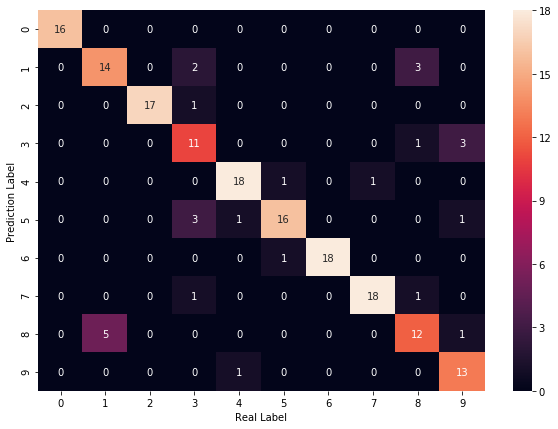

In [13]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [14]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:9 index:[5] real:5
#1 min_error:10 index:[2] real:2
#2 min_error:13 index:[1] real:8
#3 min_error:1 index:[0] real:0
#4 min_error:8 index:[1] real:1
#5 min_error:8 index:[7] real:7
#6 min_error:4 index:[6] real:6
#7 min_error:9 index:[3] real:3
#8 min_error:3 index:[2] real:2
#9 min_error:9 index:[1] real:1
#10 min_error:11 index:[7] real:7
#11 min_error:12 index:[8 9] real:4
#12 min_error:6 index:[6] real:6
#13 min_error:10 index:[3] real:3
#14 min_error:5 index:[1] real:1
#15 min_error:13 index:[3] real:3
#16 min_error:13 index:[5 9] real:9
#17 min_error:6 index:[1] real:1
#18 min_error:11 index:[7] real:7
#19 min_error:4 index:[6] real:6
#20 min_error:10 index:[8] real:8
#21 min_error:5 index:[4] real:4
#22 min_error:10 index:[3] real:3
#23 min_error:10 index:[1] real:1
#24 min_error:1 index:[4] real:4
#25 min_error:3 index:[0] real:0
#26 min_error:6 index:[5] real:5
#27 min_error:9 index:[3] real:3
#28 min_error:9 index:[6] real:6
#29 min_error:11 index:[9] real:9
#30 

In [15]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(45):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(45 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.8917748917748918
Avg Base Learner:0.8373943516800659


In [16]:
from random import randint

list_acc = []

for iii in range(45):
    pred_value = []
    error_list = []


    for j in range(1617,1617+180):
        pred = []
        for i in range(iii):
            [pred_outputs, real_outputs] = get_pred_real(i, j)
            #print(pred_outputs, real_outputs)
            pred.append(pred_outputs)
        #print(np.array(pred).T)

        error = []
        for i in range(10):
            error.append(iii - np.sum(number_codes[i][:iii] == np.array(pred).T))
        #print(error)

        pred_value.append(np.where(error==np.min(error)))
        error_list.append(np.min(error))
        #print(np.where(error==np.min(error)) )
    list_P = []
    for i in pred_value:
        if (len(i[0])) == 1:
            list_P.append(i[0][0])
        else:
            random_pick = randint(0, len(i[0])-1)
            list_P.append(i[0][random_pick])
    acc = np.sum(list_P == digits.target[1617:])/180
    print("Accuracy on training set: {}".format(acc))
    list_acc.append(acc)

Accuracy on training set: 0.1
Accuracy on training set: 0.1
Accuracy on training set: 0.15
Accuracy on training set: 0.26666666666666666
Accuracy on training set: 0.3333333333333333
Accuracy on training set: 0.3888888888888889
Accuracy on training set: 0.4166666666666667
Accuracy on training set: 0.48333333333333334
Accuracy on training set: 0.5111111111111111
Accuracy on training set: 0.5666666666666667
Accuracy on training set: 0.6
Accuracy on training set: 0.6
Accuracy on training set: 0.6666666666666666
Accuracy on training set: 0.6833333333333333
Accuracy on training set: 0.6833333333333333
Accuracy on training set: 0.7055555555555556
Accuracy on training set: 0.6888888888888889
Accuracy on training set: 0.6777777777777778
Accuracy on training set: 0.6722222222222223
Accuracy on training set: 0.7055555555555556
Accuracy on training set: 0.7222222222222222
Accuracy on training set: 0.7166666666666667
Accuracy on training set: 0.7388888888888889
Accuracy on training set: 0.761111111

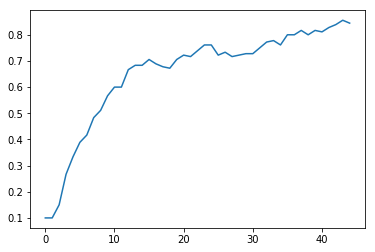

In [17]:
plt.plot(range(45),list_acc)
plt.show()

In [18]:
list_acc

[0.1,
 0.1,
 0.15,
 0.26666666666666666,
 0.3333333333333333,
 0.3888888888888889,
 0.4166666666666667,
 0.48333333333333334,
 0.5111111111111111,
 0.5666666666666667,
 0.6,
 0.6,
 0.6666666666666666,
 0.6833333333333333,
 0.6833333333333333,
 0.7055555555555556,
 0.6888888888888889,
 0.6777777777777778,
 0.6722222222222223,
 0.7055555555555556,
 0.7222222222222222,
 0.7166666666666667,
 0.7388888888888889,
 0.7611111111111111,
 0.7611111111111111,
 0.7222222222222222,
 0.7333333333333333,
 0.7166666666666667,
 0.7222222222222222,
 0.7277777777777777,
 0.7277777777777777,
 0.75,
 0.7722222222222223,
 0.7777777777777778,
 0.7611111111111111,
 0.8,
 0.8,
 0.8166666666666667,
 0.8,
 0.8166666666666667,
 0.8111111111111111,
 0.8277777777777777,
 0.8388888888888889,
 0.8555555555555555,
 0.8444444444444444]